In [ ]:
#Importing the libraries
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,re,matplotlib.ticker as ticker

In [ ]:
#Importing the dataset
d= pd.read_csv('US_Accidents_March23.csv') 

In [ ]:
# Display few rows to inspect the data
d

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# Display all column names in the dataset
d.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
# Count missing values in each column to identify nulls
d.isnull().sum() 


ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [ ]:
# Fill missing values in numerical columns with mean
num_cols = d.select_dtypes(include=np.number).columns
for col in num_cols:
    d[col] = d[col].fillna(d[col].mean())

In [ ]:
# Fill missing values in categorical columns with mode
cat_cols = d.select_dtypes(include='object').columns
for col in cat_cols:
    d[col] = d[col].fillna(d[col].mode()[0])

In [ ]:
# Ensure that all missing values have been handled
d.isnull().sum() 

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [ ]:
# Check and count duplicate rows in the dataset
d.duplicated().sum()

np.int64(0)

In [ ]:
# Display basic info about the dataset including datatypes
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
# Print value counts for key categorical columns (source, severity, weather, etc.)
x=['Source','Severity','State','Zipcode','Timezone','Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
for i in x:
    print(d[i].value_counts())
    print()

Source
Source1    4325632
Source2    3305373
Source3      97389
Name: count, dtype: int64

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

Zipcode
91761         13162
91706         10022
92407          8922
92507          8850
33186         

In [ ]:
# Clean and convert 'Start_Time' and 'End_Time' to datetime objects
def clean_datetime_string(x):
    return re.sub(r'(\d{2}:\d{2}:\d{2}).*', r'\1', x)
d['Start_Time'] = d['Start_Time'].astype(str).apply(clean_datetime_string)
d['Start_Time'] = pd.to_datetime(d['Start_Time'], format='%Y-%m-%d %H:%M:%S')
d['End_Time'] = d['End_Time'].astype(str).apply(clean_datetime_string)
d['End_Time'] = pd.to_datetime(d['End_Time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Extract hour, date, month, and year from Start and End time
d['Start_Hour'] = d['Start_Time'].dt.hour
d["Start_Day"]=d['Start_Time'].dt.day_name()
d['Start_Date'] = d['Start_Time'].dt.date
d['Start_Month'] = d['Start_Time'].dt.month
d['Start_Year'] = d['Start_Time'].dt.year
d['End_Hour'] = d['End_Time'].dt.hour
d["End_Day"]=d['End_Time'].dt.day_name()
d['End_Date'] = d['End_Time'].dt.date
d['End_Month'] = d['End_Time'].dt.month
d['End_Year'] = d['End_Time'].dt.year
d['Duration(mins)'] = (d['End_Time'] - d['Start_Time']).dt.total_seconds() / 60

In [15]:
for i in d['Weather_Condition'].unique():
    print(i)

Light Rain
Overcast
Mostly Cloudy
Rain
Light Snow
Haze
Scattered Clouds
Partly Cloudy
Clear
Snow
Light Freezing Drizzle
Light Drizzle
Fog
Shallow Fog
Heavy Rain
Light Freezing Rain
Cloudy
Drizzle
Fair
Light Rain Showers
Mist
Smoke
Patches of Fog
Light Freezing Fog
Light Haze
Light Thunderstorms and Rain
Thunderstorms and Rain
Volcanic Ash
Blowing Sand
Blowing Dust / Windy
Widespread Dust
Fair / Windy
Rain Showers
Mostly Cloudy / Windy
Light Rain / Windy
Hail
Heavy Drizzle
Showers in the Vicinity
Thunderstorm
Light Rain Shower
Light Rain with Thunder
Partly Cloudy / Windy
Thunder in the Vicinity
T-Storm
Heavy Thunderstorms and Rain
Thunder
Heavy T-Storm
Funnel Cloud
Heavy T-Storm / Windy
Blowing Snow
Light Thunderstorms and Snow
Heavy Snow
Low Drifting Snow
Light Ice Pellets
Ice Pellets
Squalls
N/A Precipitation
Cloudy / Windy
Light Fog
Sand
Snow Grains
Snow Showers
Heavy Thunderstorms and Snow
Rain / Windy
Heavy Rain / Windy
Heavy Ice Pellets
Light Snow / Windy
Heavy Freezing Rain
Smal

In [ ]:
# Simplify weather condition into basic categories (Clear, Rain, etc.)
def simplify_weather(condition):
    condition = str(condition).lower()

    if 'clear' in condition or 'fair' in condition:
        return 'Clear'
    elif 'wind' in condition or 'dust' in condition or 'sand' in condition:
        return 'Windy'
    elif 'cloud' in condition or 'overcast' in condition:
        return 'Cloudy'
    elif 'rain' in condition or 'drizzle' in condition or 'shower' in condition:
        return 'Rain'
    elif 'snow' in condition or 'sleet' in condition or 'blowing snow' in condition or 'ice pellets' in condition:
        return 'Snow'
    elif 'fog' in condition or 'haze' in condition or 'mist' in condition:
        return 'Fog'
    elif 'thunder' in condition or 't-storm' in condition or 'storm' in condition:
        return 'Thunderstorm'
    else:
        return 'Other'
d['Weather_Simple'] = d['Weather_Condition'].apply(simplify_weather)


In [17]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 58 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [18]:
d.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),...,Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Hour,Start_Month,Start_Year,End_Hour,End_Month,End_Year,Duration(mins)
count,7.728394e+06,7728394,7728394,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,...,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,2020-06-04 04:23:22.765653760,2020-06-04 11:47:48.023066880,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,...,9.090376e+00,7.685490e+00,8.407210e-03,1.232857e+01,6.706355e+00,2.019908e+03,1.303476e+01,6.704709e+00,2.019909e+03,4.444210e+02
min,1.000000e+00,2016-01-14 20:18:33,2016-02-08 06:37:08,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,1.000000e+00,2.016000e+03,1.216667e+00
25%,2.000000e+00,2018-11-23 04:01:12.249999872,2018-11-23 05:45:20.500000,3.339963e+01,-1.172194e+02,3.518648e+01,-9.572557e+01,0.000000e+00,5.000000e+01,5.200000e+01,...,1.000000e+01,5.000000e+00,0.000000e+00,8.000000e+00,3.000000e+00,2.018000e+03,9.000000e+00,3.000000e+00,2.018000e+03,3.150000e+01
50%,2.000000e+00,2020-11-11 08:40:22,2020-11-11 15:56:29,3.582397e+01,-8.776662e+01,3.626183e+01,-9.572557e+01,3.000000e-02,6.300000e+01,5.825105e+01,...,1.000000e+01,7.685490e+00,0.000000e+00,1.300000e+01,7.000000e+00,2.020000e+03,1.400000e+01,7.000000e+00,2.020000e+03,7.483333e+01
75%,2.000000e+00,2022-01-20 07:30:08.500000,2022-01-20 17:44:40,4.008496e+01,-8.035368e+01,3.751726e+01,-8.499048e+01,4.640000e-01,7.600000e+01,7.100000e+01,...,1.000000e+01,1.000000e+01,8.407210e-03,1.700000e+01,1.000000e+01,2.022000e+03,1.800000e+01,1.000000e+01,2.022000e+03,1.251500e+02
90%,3.000000e+00,2022-09-04 15:17:31,2022-09-05 06:48:23.700000,4.248776e+01,-7.618176e+01,4.099985e+01,-7.809397e+01,1.468000e+00,8.400000e+01,8.200000e+01,...,1.000000e+01,1.400000e+01,8.407210e-03,1.900000e+01,1.200000e+01,2.022000e+03,2.000000e+01,1.200000e+01,2.022000e+03,2.452333e+02
95%,3.000000e+00,2022-12-09 15:58:00,2022-12-09 19:25:30,4.485865e+01,-7.395609e+01,4.309650e+01,-7.558971e+01,2.670000e+00,8.900000e+01,8.700000e+01,...,1.000000e+01,1.700000e+01,1.000000e-02,2.100000e+01,1.200000e+01,2.022000e+03,2.200000e+01,1.200000e+01,2.022000e+03,3.600000e+02
99%,4.000000e+00,2023-02-04 23:38:04.200000,2023-02-05 12:57:27.850000128,4.747886e+01,-7.148164e+01,4.612846e+01,-7.349051e+01,6.955000e+00,9.600000e+01,9.400000e+01,...,1.000000e+01,2.300000e+01,1.400000e-01,2.300000e+01,1.200000e+01,2.023000e+03,2.300000e+01,1.200000e+01,2.023000e+03,7.980000e+02
max,4.000000e+00,2023-03-31 23:30:00,2023-03-31 23:59:00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,...,1.400000e+02,1.087000e+03,3.647000e+01,2.300000e+01,1.200000e+01,2.023000e+03,2.300000e+01,1.200000e+01,2.023000e+03,2.812939e+06


C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2942716707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d, y='Weather_Simple', order=d['Weather_Simple'].value_counts().index, palette='viridis')


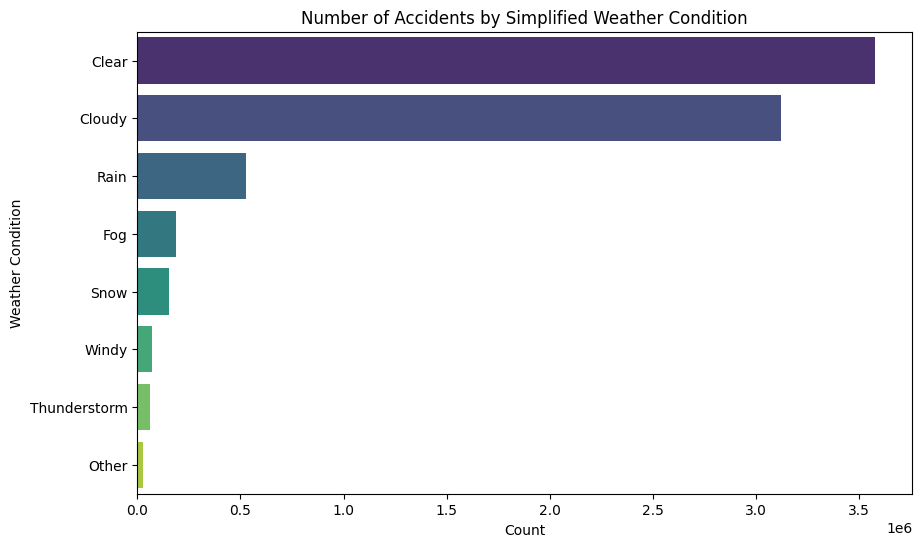

In [19]:
#Accidents by weather conditions
plt.figure(figsize=(10,6))
sns.countplot(data=d, y='Weather_Simple', order=d['Weather_Simple'].value_counts().index, palette='viridis')
plt.title('Number of Accidents by Simplified Weather Condition')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.show()


High accident counts in clear/cloudy weather don’t imply those conditions are dangerous — just that people drive more often and possibly more carelessly in them.

Severe weather (rain, snow, fog) likely causes fewer total accidents but higher severity or risk per trip.

Risk mitigation in severe weather may be working (fewer people driving, use of safety precautions, etc.).

In [20]:
d['Duration(mins)'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])



count    7.728394e+06
mean     4.444210e+02
std      1.351229e+04
min      1.216667e+00
25%      3.150000e+01
50%      7.483333e+01
75%      1.251500e+02
90%      2.452333e+02
95%      3.600000e+02
99%      7.980000e+02
max      2.812939e+06
Name: Duration(mins), dtype: float64

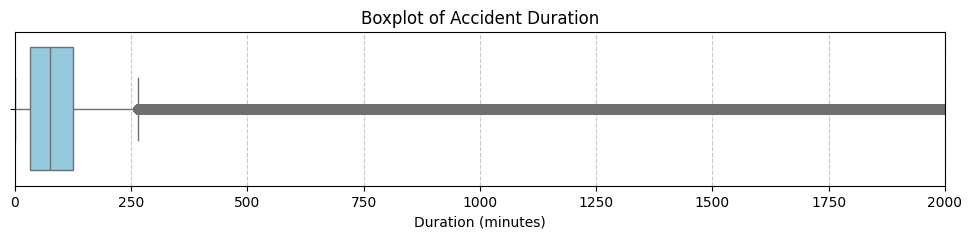

In [21]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=d['Duration(mins)'], color='skyblue')
plt.title('Boxplot of Accident Duration')
plt.xlabel('Duration (minutes)')
plt.xlim(0,2000)  # You can adjust this based on what you're analyzing
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The majority of accidents have a short duration, as shown by the compressed box on the left side (within ~250 minutes).

A long tail to the right indicates the presence of many extreme outliers, where accidents lasted much longer.

This suggests that while most incidents are cleared quickly, a few severe or complex cases cause prolonged disruption.

Median duration is low, showing accidents are usually resolved fast.

Important for resource planning: authorities should focus on quick response for typical cases, but also prepare for rare, high-duration events.

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2237327356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Start_Hour', data=d, palette='viridis')


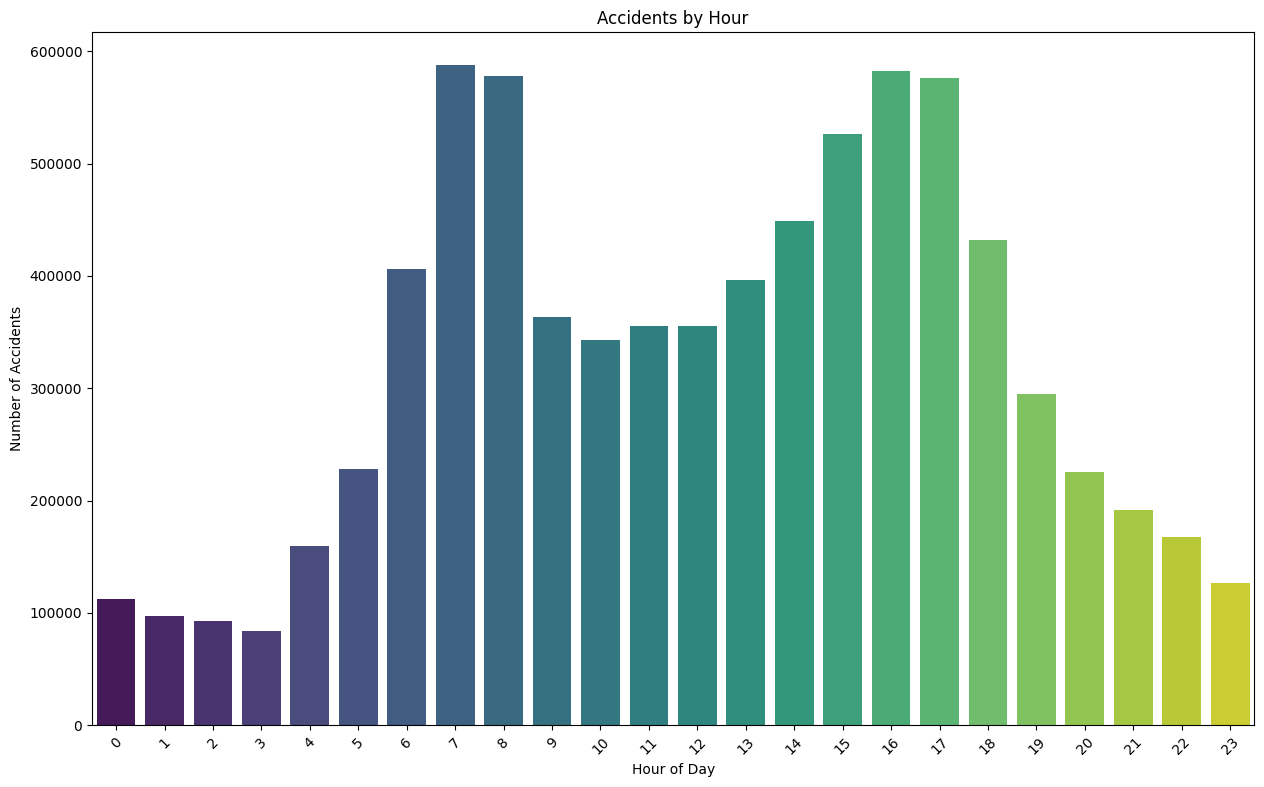

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2237327356.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Start_Day', data=d, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='coolwarm')


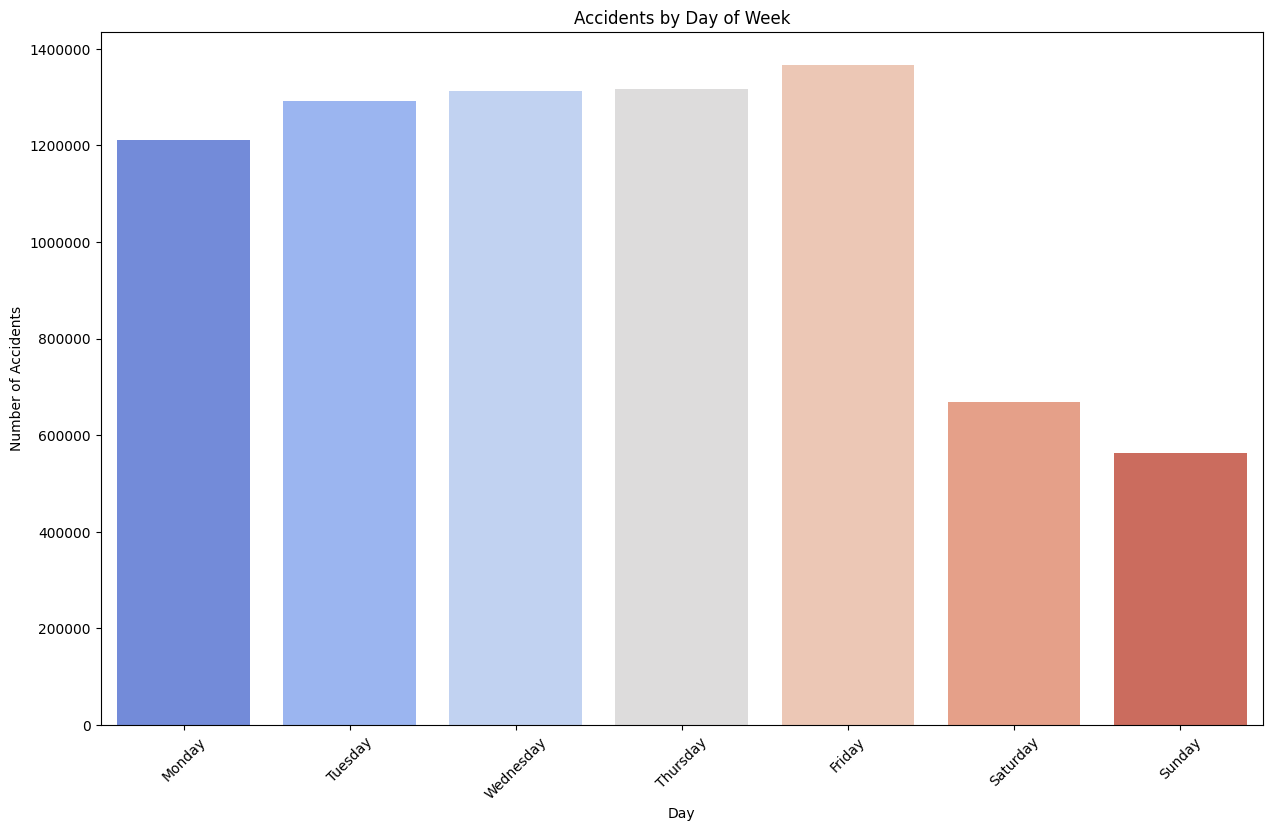

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2237327356.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Start_Month', data=d, palette='rocket')


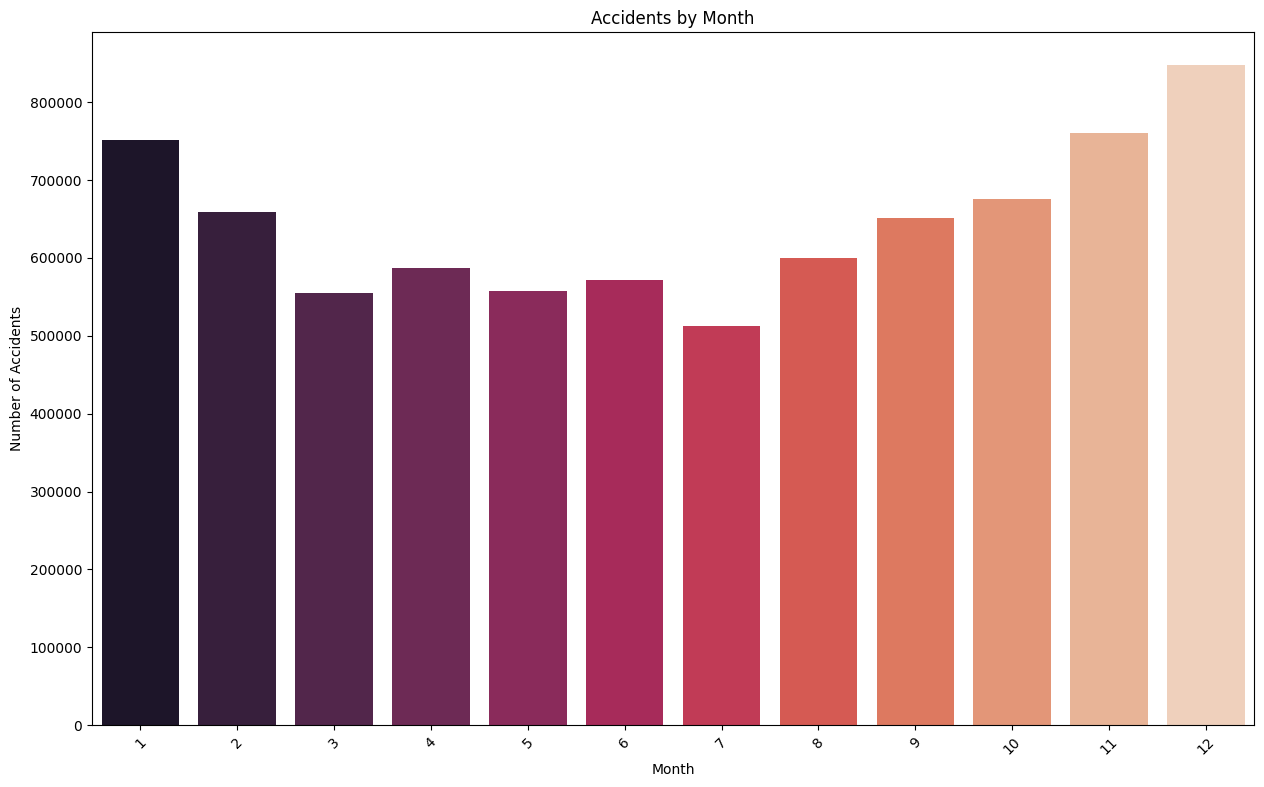

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2237327356.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Start_Year', data=d, palette='Set1')


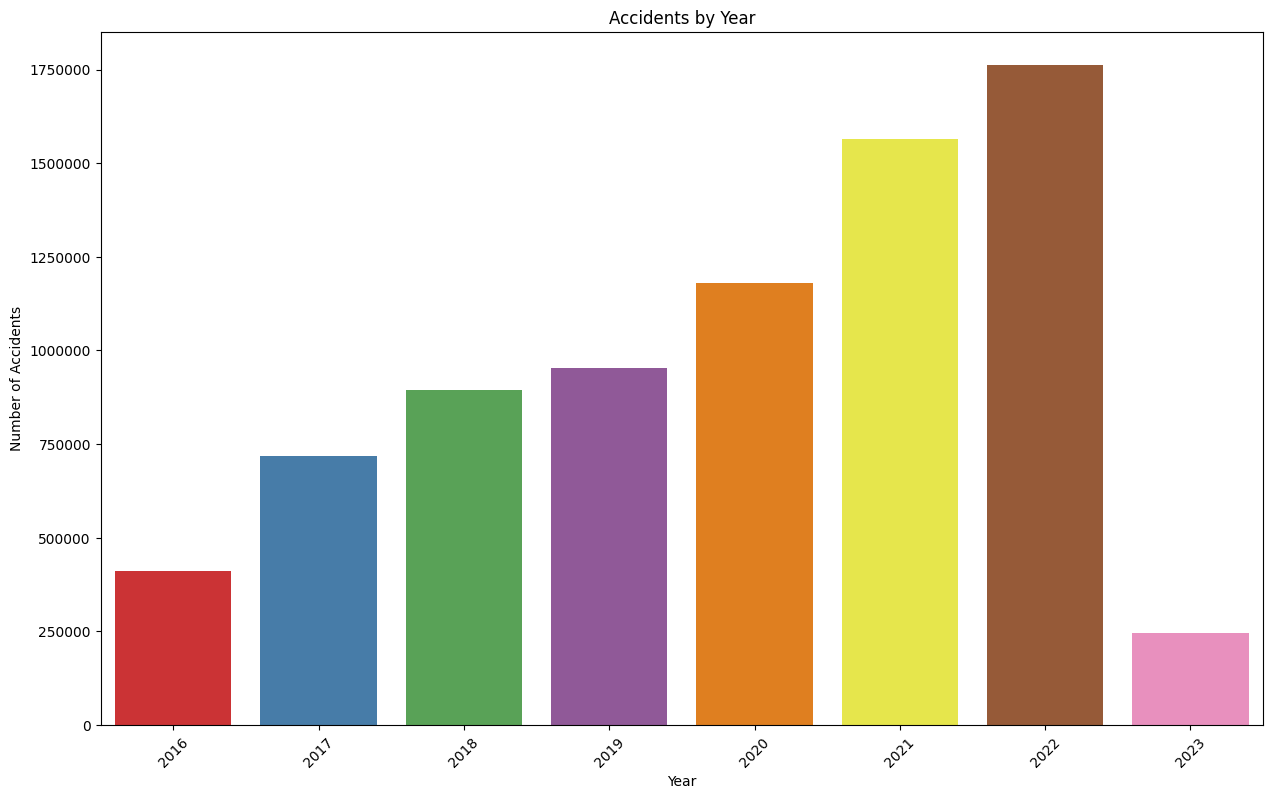

In [22]:

# 1. Accident Count by Hour
plt.figure(figsize=(15,9))
sns.countplot(x='Start_Hour', data=d, palette='viridis')
plt.title('Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()


# 2. Accident Count by Day of Week
plt.figure(figsize=(15,9))
sns.countplot(x='Start_Day', data=d, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='coolwarm')
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()


# 3. Accident Count by Month
plt.figure(figsize=(15,9))
sns.countplot(x='Start_Month', data=d, palette='rocket')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()


# 4. Accident Count by Year
plt.figure(figsize=(15,9))
sns.countplot(x='Start_Year', data=d, palette='Set1')
plt.title('Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()





Hourly Trend:
The number of accidents rises sharply during morning (7–8 AM) and evening (4–6 PM), matching peak commuting hours. Very few accidents occur late at night (12–4 AM) due to reduced traffic.

Day-wise Trend:
Fridays have the highest accident count, followed closely by other weekdays, indicating heavy weekday traffic. Saturdays and Sundays show a significant drop, likely due to less work travel.

Monthly Trend:
Accidents are lowest in mid-year (July) and gradually increase towards December, suggesting the impact of seasonal travel, holidays, or changing weather conditions.

Year-wise Trend:
There's a steady increase in accidents from 2016 to 2022, which may reflect rising traffic or improved data recording. The drop in 2023 is likely due to incomplete data collection for the year.

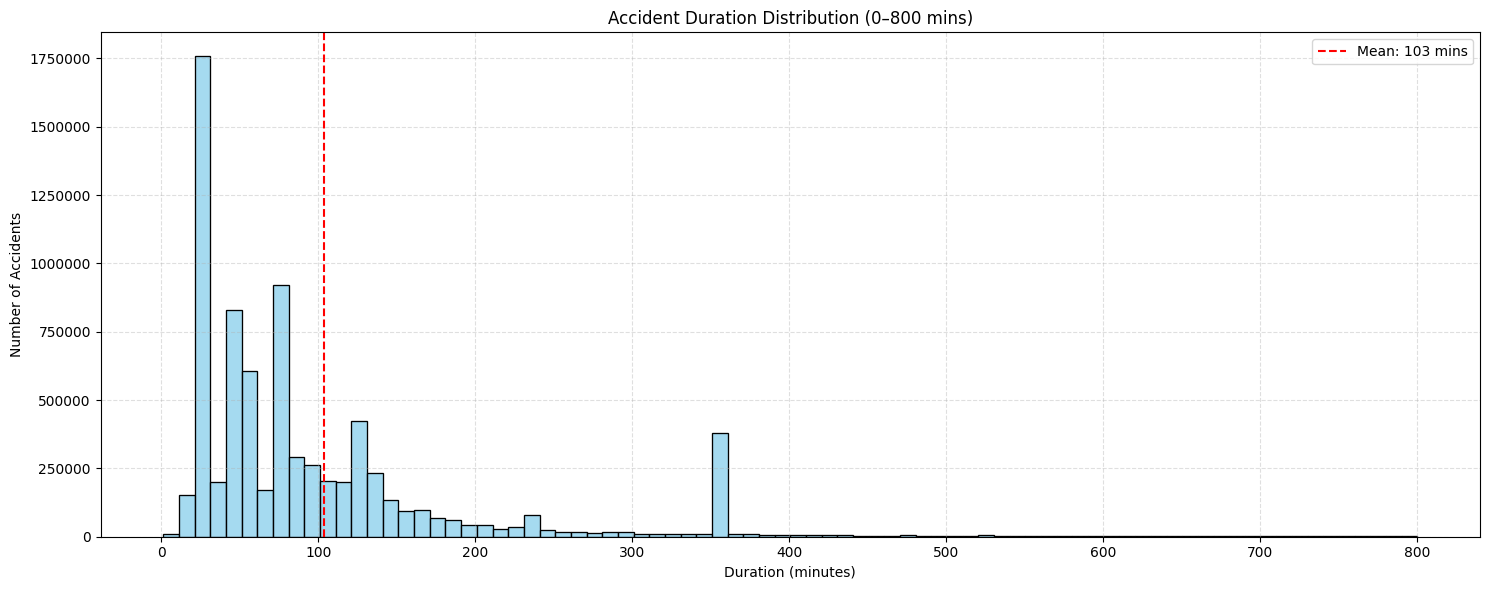

In [23]:
mean_duration = d[d['Duration(mins)'] <= 800]['Duration(mins)'].mean()

plt.figure(figsize=(15, 6))
ax = sns.histplot(d[d['Duration(mins)'] <= 800]['Duration(mins)'], bins=80, color='skyblue')

# Plot mean line
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {int(mean_duration)} mins')

# Styling
plt.title('Accident Duration Distribution (0–800 mins)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Accidents')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Highly Right-Skewed Distribution:
Most accidents have shorter durations, with frequency dropping steeply as duration increases.

Peak at ~25 mins:
The highest number of accidents are resolved around the 25-minute mark, indicating many incidents are minor and quickly managed.

Mean Duration = 103 mins (Marked in Red):
Despite the concentration near 25 mins, the mean is pulled higher due to fewer but extremely long-duration accidents (outliers beyond 300 mins).

Long Tail Beyond 200 mins:
A long tail signifies some serious or complex incidents requiring extensive resolution times.

Secondary Spikes (~120 & ~360 mins):
These may point to standardized reporting times, rounding, or classification intervals in data logging.

Outliers and Data Quality:
High frequency at very specific durations (e.g., exact 360 mins) suggests potential manual data entry artifacts or rounding errors.

In [24]:
d['Is_Weekend'] = pd.to_datetime(d['Start_Date']).map(lambda x: x.weekday() >= 5)
d['Rush_Hour'] = d['Start_Hour'].apply(lambda x: 'Rush' if 7 <= x <= 9 or 16 <= x <= 19 else 'Non-Rush')

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2483401296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Weekend', data=d, palette='coolwarm')


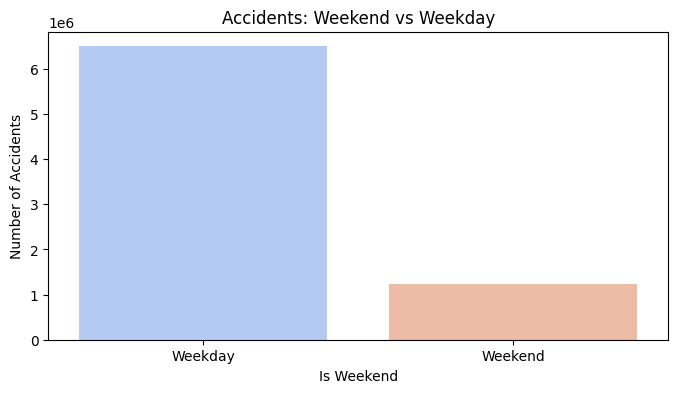

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2483401296.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rush_Hour', data=d, palette='viridis')


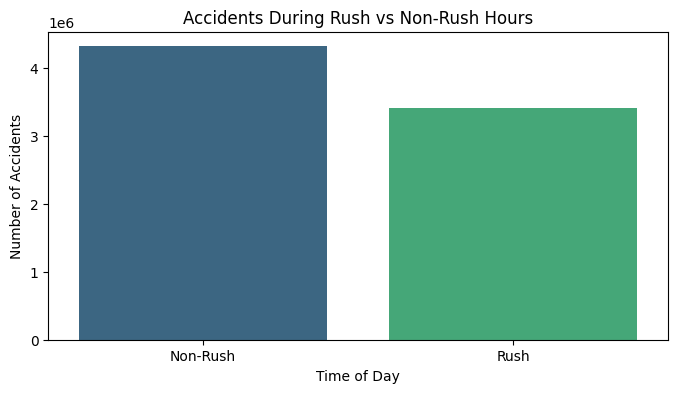

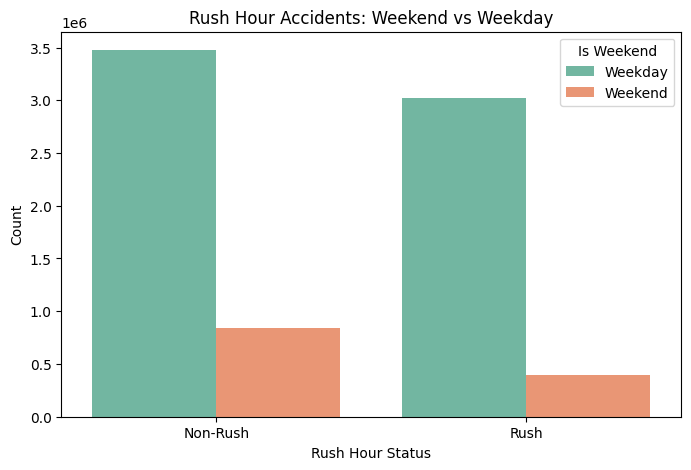

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\2483401296.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rush_Hour', y='Duration(mins)', data=d[d['Duration(mins)'] < 300], palette='pastel')


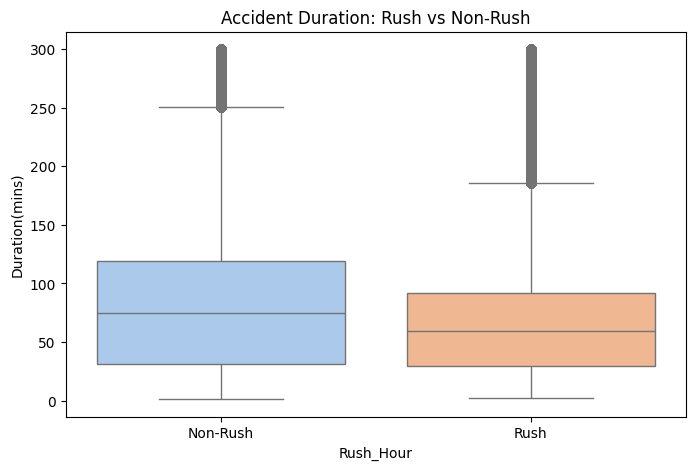

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='Is_Weekend', data=d, palette='coolwarm')
plt.title('Accidents: Weekend vs Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Number of Accidents')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='Rush_Hour', data=d, palette='viridis')
plt.title('Accidents During Rush vs Non-Rush Hours')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Rush_Hour', hue='Is_Weekend', data=d, palette='Set2')
plt.title('Rush Hour Accidents: Weekend vs Weekday')
plt.xlabel('Rush Hour Status')
plt.ylabel('Count')
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Rush_Hour', y='Duration(mins)', data=d[d['Duration(mins)'] < 300], palette='pastel')
plt.title('Accident Duration: Rush vs Non-Rush')
plt.show()


-Non-Rush Hours record more accidents than Rush Hours (~4.4M vs ~3.4M).

-Weekdays dominate both Rush and Non-Rush accident counts.

-Weekend accident counts are significantly lower in both time slots.

-Median duration is higher for Non-Rush accidents.

-Outliers and maximum durations are higher during Non-Rush hours.

-Distribution during rush is tighter and skewed lower.

-Weekdays have over 5 times more accidents than Weekends.

-Weekdays + Rush Hours = Peak Risk Zones due to traffic density.

-Non-Rush periods are unexpectedly dangerous in volume and duration — a focus area for safety campaigns.

-Weekends show lower volume, but not necessarily less risk — could involve different accident types (e.g., leisure, high-speed).

In [26]:
weather_cols = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Pressure(in)', 
                'Wind_Speed(mph)', 'Wind_Chill(F)', 'Precipitation(in)']

for i in weather_cols:
    print(d[i].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))

    Q1 = d[i].quantile(0.25)
    Q3 = d[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = d[(d[i] < Q1 - 1.5 * IQR) | (d[i] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {i}:", outliers.shape[0],'\n')

count    7.728394e+06
mean     6.166329e+01
std      1.881102e+01
min     -8.900000e+01
25%      5.000000e+01
50%      6.300000e+01
75%      7.600000e+01
90%      8.400000e+01
95%      8.900000e+01
99%      9.600000e+01
max      2.070000e+02
Name: Temperature(F), dtype: float64
Outliers in Temperature(F): 65279 

count    7.728394e+06
mean     6.483104e+01
std      2.256239e+01
min      1.000000e+00
25%      4.900000e+01
50%      6.600000e+01
75%      8.400000e+01
90%      9.300000e+01
95%      9.700000e+01
99%      1.000000e+02
max      1.000000e+02
Name: Humidity(%), dtype: float64
Outliers in Humidity(%): 0 

count    7.728394e+06
mean     9.090376e+00
std      2.657336e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
90%      1.000000e+01
95%      1.000000e+01
99%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64
Outliers in Visibility(mi): 1658163 

count    7.728394e+06
mean     2.953899e+01
std      9.969900e-

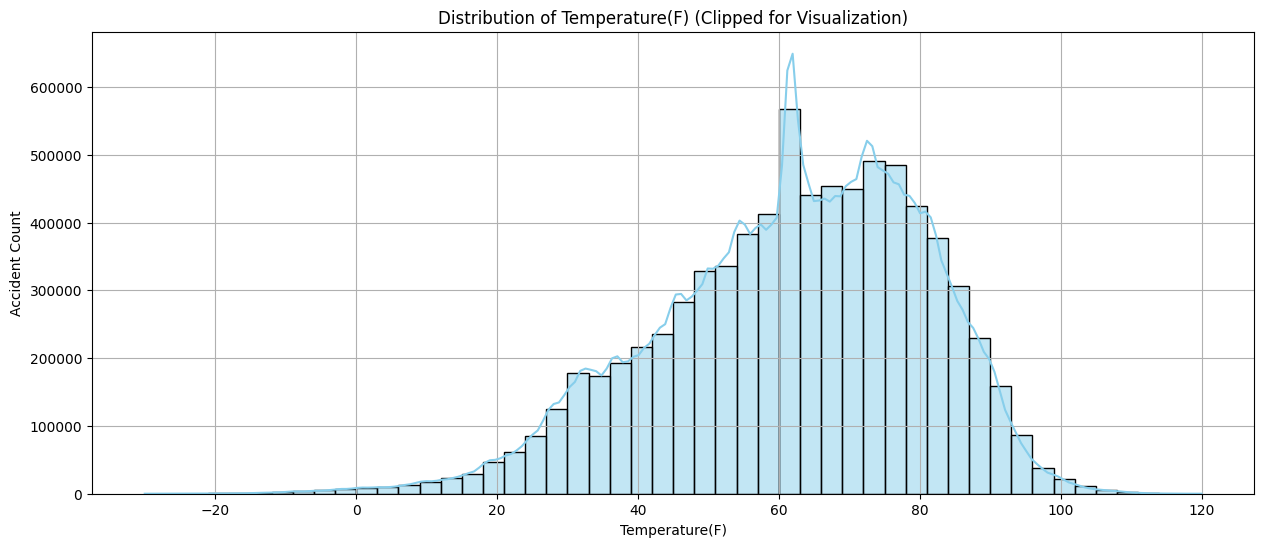

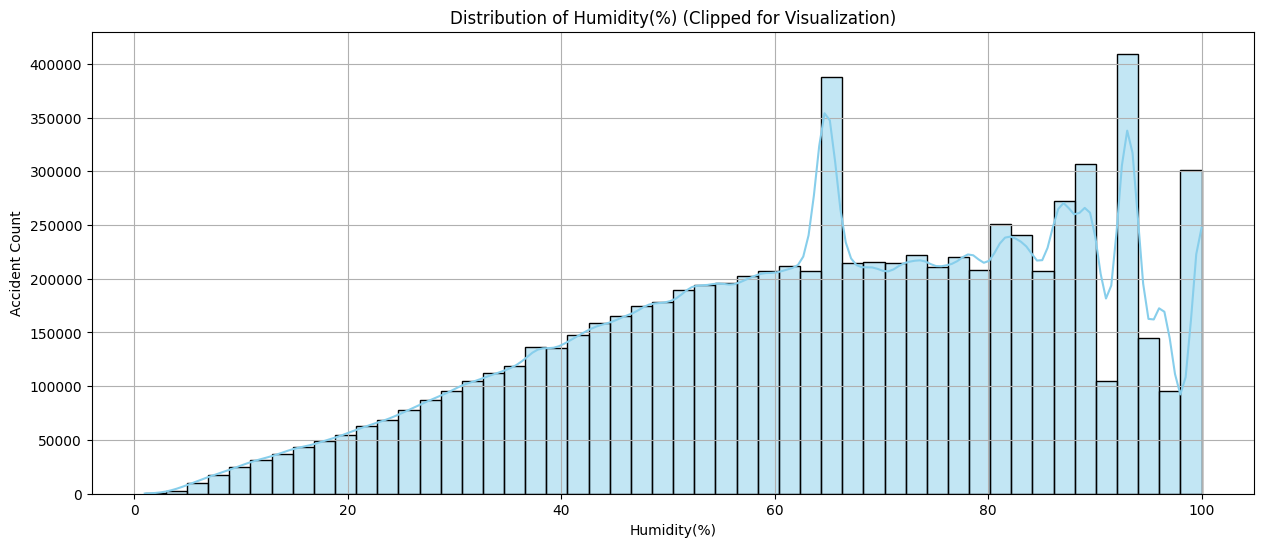

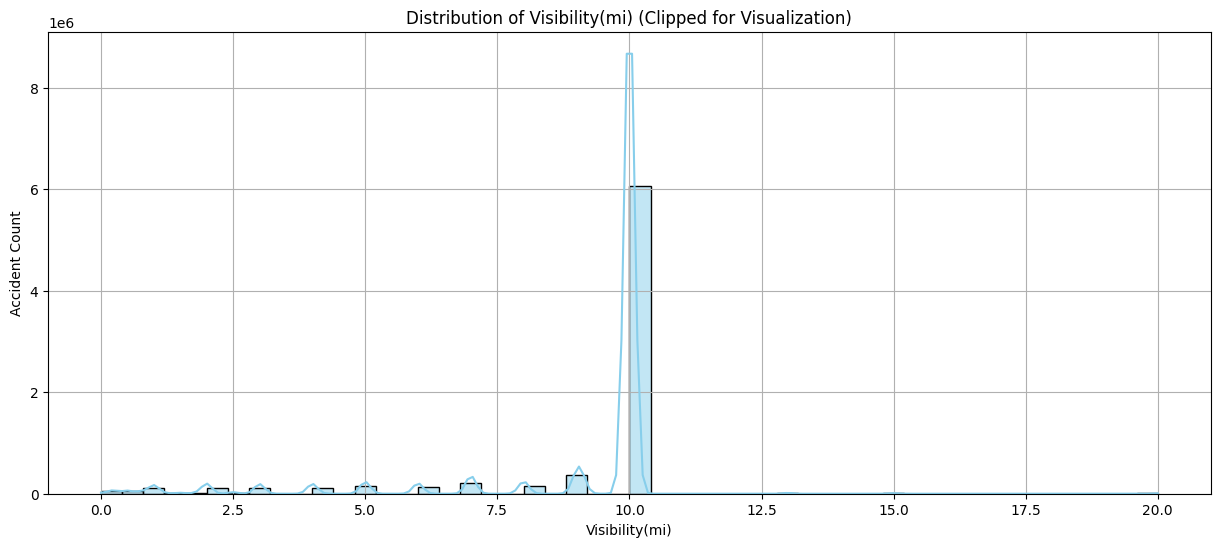

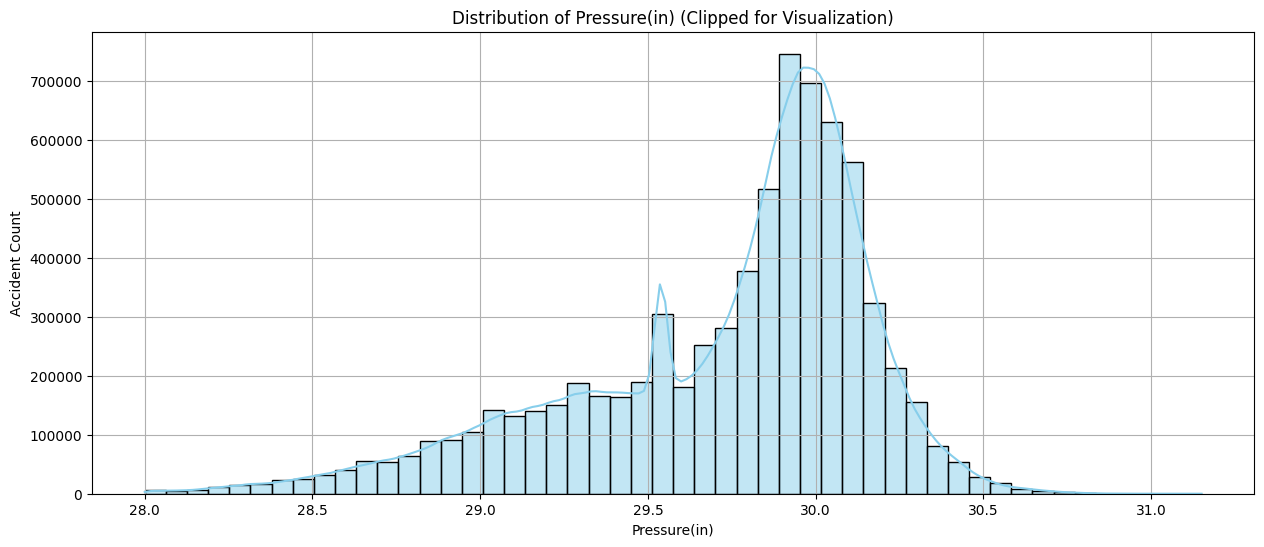

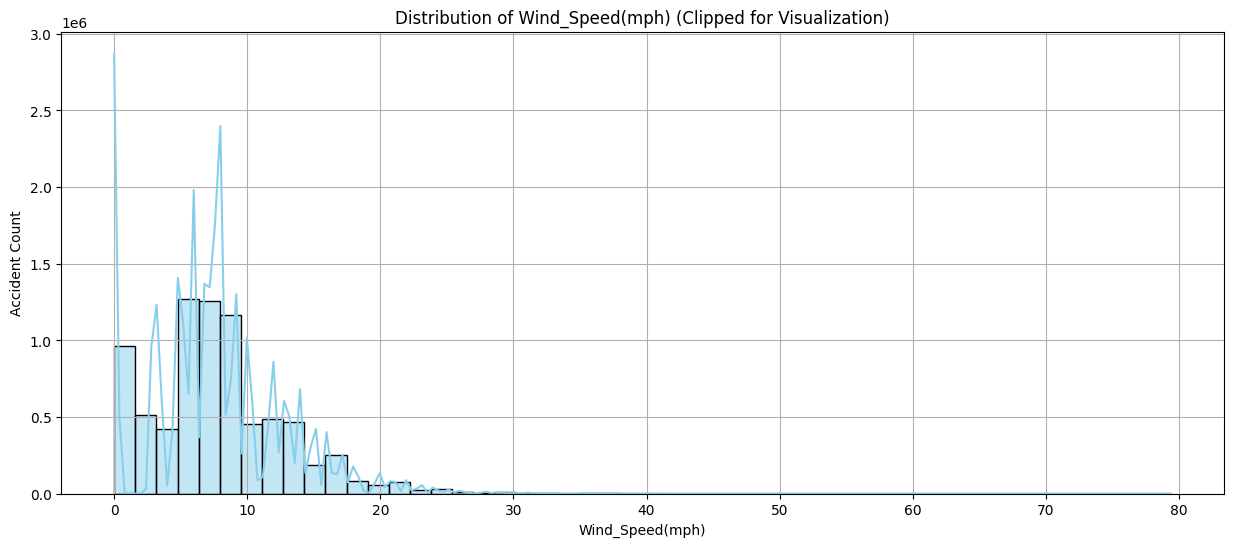

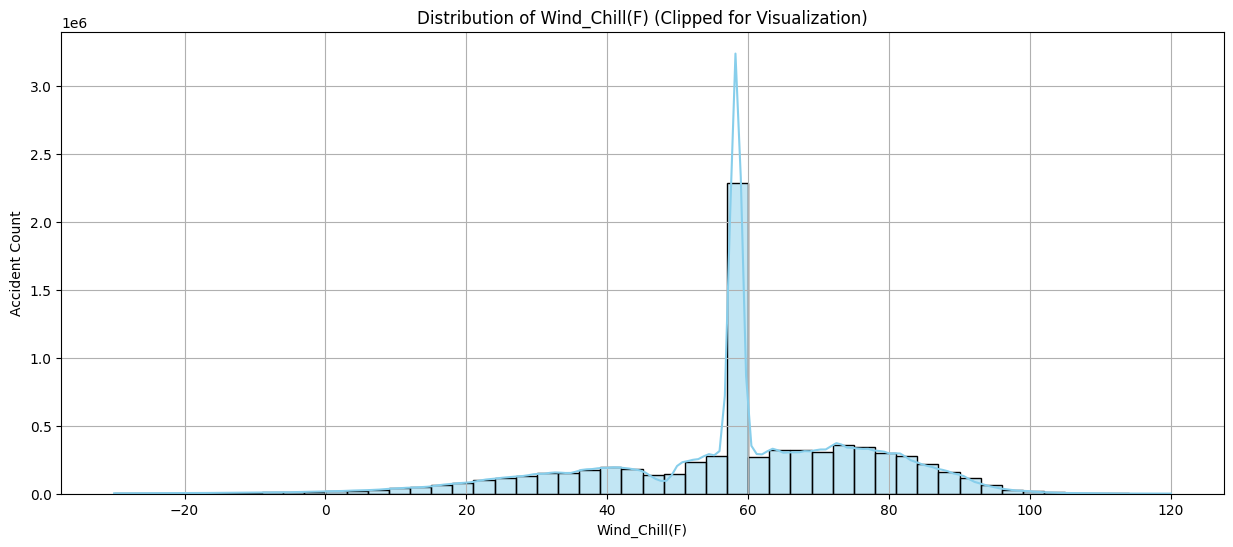

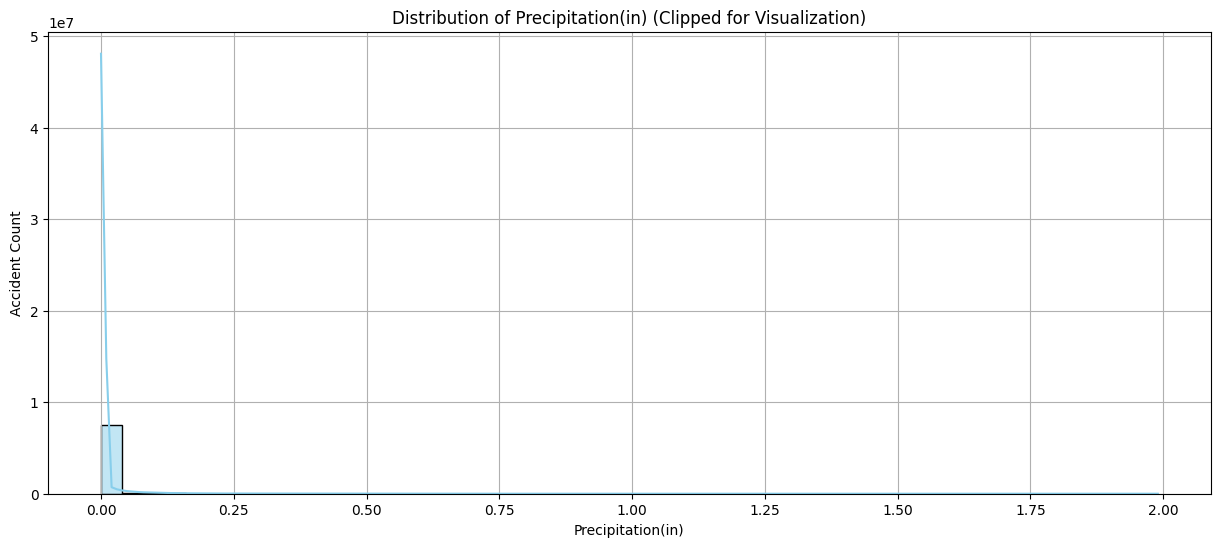

In [27]:
visual_limits = {
    'Temperature(F)': (-30, 120),
    'Humidity(%)': (0, 100),
    'Visibility(mi)': (0, 20),
    'Pressure(in)': (28, 32),
    'Wind_Speed(mph)': (0, 80),
    'Wind_Chill(F)': (-30, 120),
    'Precipitation(in)': (0, 2)
}
for col, (lower, upper) in visual_limits.items():
    plt.figure(figsize=(15,6))
    sns.histplot(d[(d[col] >= lower) & (d[col] <= upper)][col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (Clipped for Visualization)')
    plt.grid(True)
    plt.xlabel(col)
    plt.ylabel('Accident Count')
    plt.show()


1. Temperature (°F)
>Shape: Slightly right-skewed (positive skew).
>
>Peak Range: Around 60–70°F.
>
>Interpretation: Most accidents occurred in moderate temperatures, which is expected since these temperatures are most common. Fewer accidents happen in extreme cold or heat (left and right tails).
>
>Insight: Temperature alone may not be a major accident cause—it reflects natural seasonality and population activity.
>
2. Visibility (miles)
>Shape: Extremely right-skewed with a very sharp peak at 10 miles (max visibility).
>
>Interpretation: Most accidents occur when visibility is optimal (likely because clear visibility is the norm).
>
>Insight: While poor visibility is dangerous, it's rare. So, the .number of accidents in good visibility simply reflects its frequency rather than safety.
>
3. Humidity (%)
>Shape: Bimodal or irregular, with spikes around 60% and 90–100%.
>
>Interpretation: Accidents are common in both moderately and highly humid conditions.
>
>Insight: High humidity might correlate with foggy/rainy conditions, potentially increasing accident risk. Also, this distribution might be affected by regional or seasonal trends.
>
4. Pressure (inches)
>Shape: Nearly normal, centered around 30 inHg.
>
>Interpretation: Most accidents occur at normal atmospheric pressures.
>
>Insight: Pressure itself is unlikely to cause accidents, but can indirectly relate to weather systems (e.g., storms, low pressure).
>
5. Wind Speed (mph)
>Shape: Right-skewed with a sharp peak at 0–5 mph.
>
>Interpretation: Most accidents happen in low-wind conditions, again likely due to its frequency.
>
>Insight: High wind may contribute to dangerous driving but is rare. Spiky pattern may indicate measurement granularity or noise.
>
6. Wind Chill (°F)
>Shape: Very sharp peak at ~60°F, then roughly symmetrical distribution around it.
>
>Interpretation: Matches general temperature trends. Spike could indicate default or rounded values in data.
>
>Insight: Not much insight on causation unless extreme wind chills are isolated and linked to higher severity.
>
7. Precipitation (inches)
>Shape: Very strongly right-skewed; huge spike at 0 inches.
>
>Interpretation: Most accidents happen in dry conditions. This suggests dry weather is far more common.
>
>Insight: When it does rain (right tail), fewer accidents are observed in absolute numbers, but proportionally the risk per event may be higher.

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\238284575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')


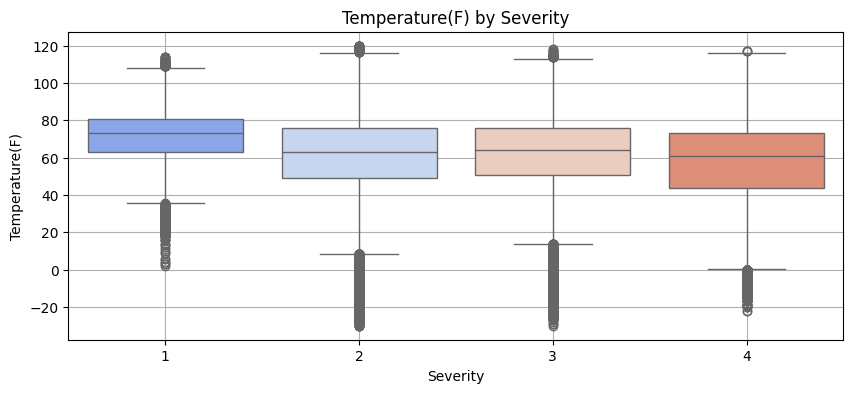

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\238284575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')


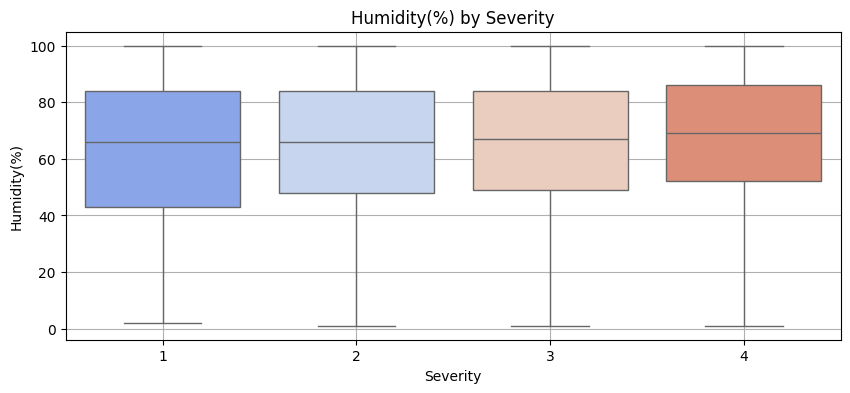

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\238284575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')


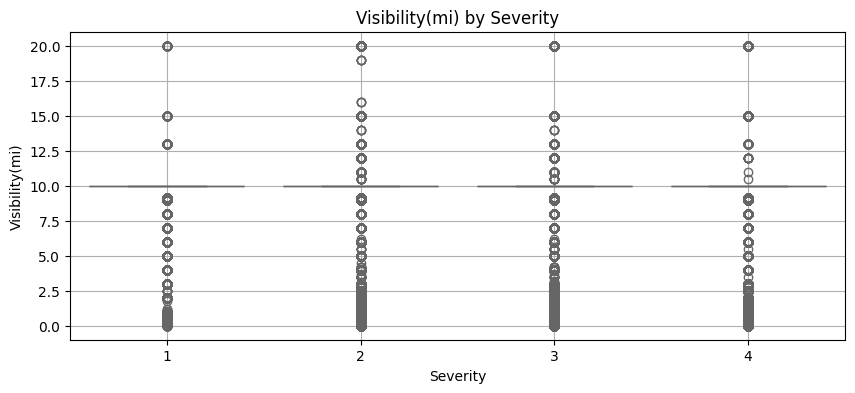

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\238284575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')


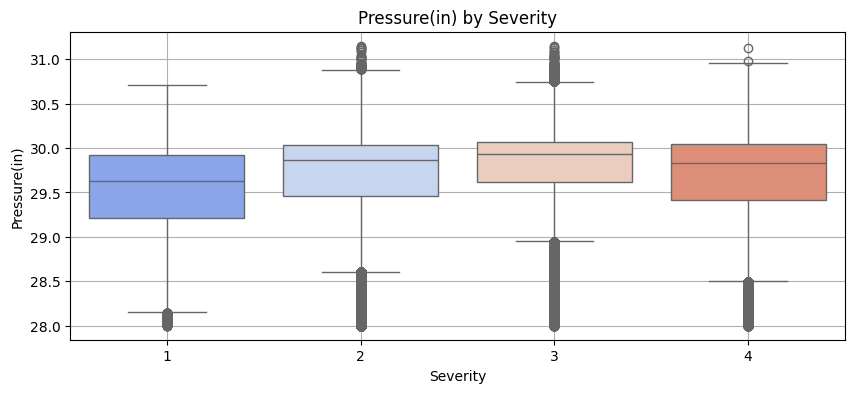

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\238284575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')


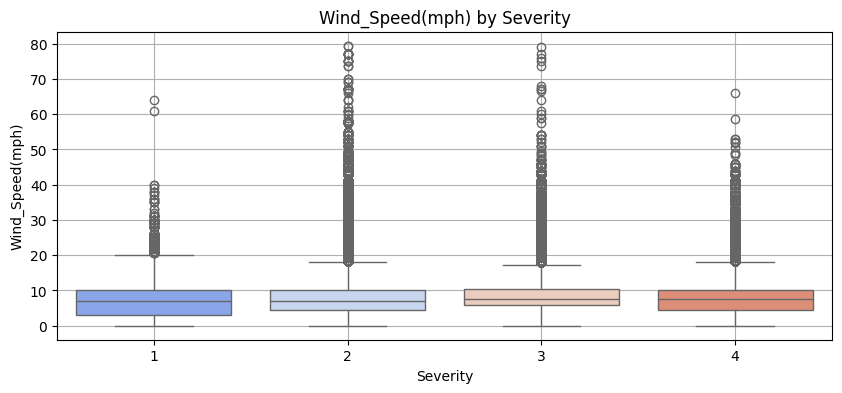

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\238284575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')


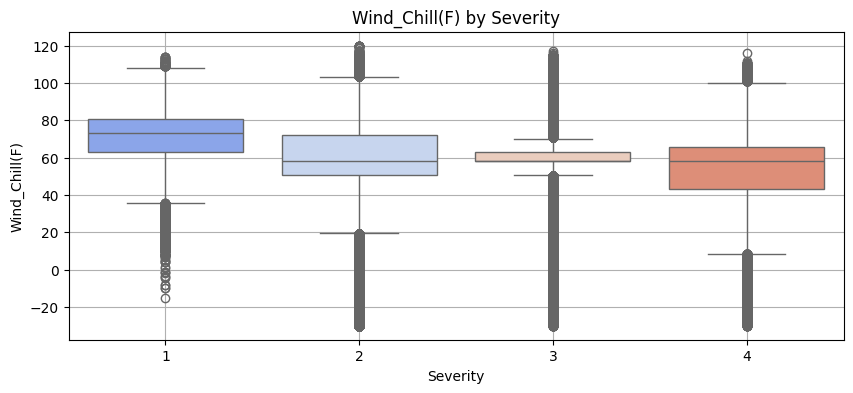

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\238284575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')


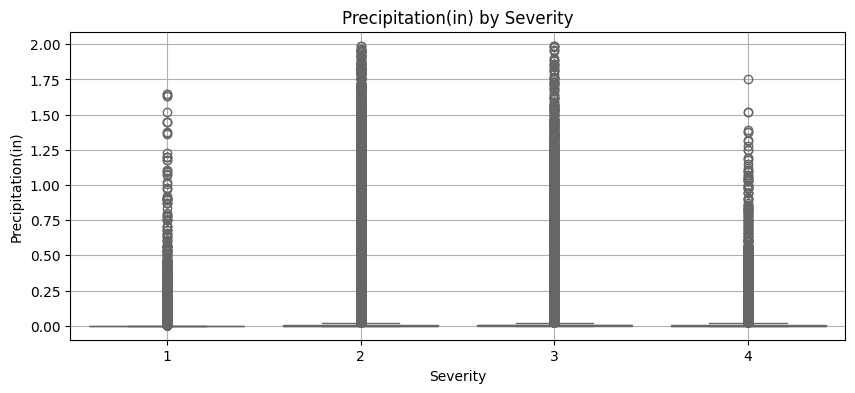

In [28]:
for col, (lower, upper) in visual_limits.items():
    plt.figure(figsize=(10,4))
    sns.boxplot(x='Severity', y=col, data=d[(d[col] >= lower) & (d[col] <= upper)], palette='coolwarm')
    plt.title(f'{col} by Severity')
    plt.grid(True)
    plt.show()


1. Temperature (°F) vs Severity
>Medians across severity levels are similar (~60–70°F).
>
>No major change in severity with temperature.
>
>Slight increase in temperature for higher severities, but could be due to outliers or natural variation.
>
2. Pressure (in) vs Severity
>Severity 1 tends to occur at slightly lower pressure than others.
>
>Higher severity (3 & 4) clusters more around normal pressure (~30 inHg).
>
>Subtle trend, but not strongly distinguishing.
>
3. Humidity (%) vs Severity
>Median humidity increases slightly with severity.
>
>Severity 4 accidents show higher upper quartiles.
>
>Higher humidity might slightly correlate with worse accidents, potentially due to fog/mist/rain.
>
4. Wind Speed (mph) vs Severity
>Medians are consistently low across all severities (~5 mph).
>
>Wide spread of outliers at higher severities, suggesting:
>
>Severe accidents can happen at higher wind speeds, even if rare.
>
>Notable range expansion in Severity 4.
>
5. Wind Chill (°F) vs Severity
>Very similar to the temperature plot.
>
>Slight drop in median wind chill with increasing severity.
>
>Severity 4 includes lower wind chills → Cold-related risks could be higher.
>
6. Visibility (mi) vs Severity
>Very consistent medians (~10 mi) across severities.
>
>No visible relationship between visibility and severity in boxplot form.
>
>However, this may be misleading because extreme low visibility cases are rare.
>
7. Precipitation (in) vs Severity
>Most data centered at 0 inches across all severity levels.
>
>Presence of outliers for higher precipitation more visible in severity 3 & 4.
>
>Suggests wet weather could contribute to severity, though only in fewer cases.

Most weather conditions don’t drastically shift with accident severity.

Humidity, wind speed, precipitation and wind chill show the most noticeable patterns.

Boxplots reveal that rare/extreme weather conditions may not influence accident count heavily (from earlier histograms), but could impact severity when they occur.

In [29]:
summary = d[visual_limits.keys()].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
summary[['min', '1%', '5%', '25%', '50%', '75%', '95%', '99%', 'max']]


,min,1%,5%,25%,50%,75%,95%,99%,max
Temperature(F),-89.0,12.9,28.00,50.00,63.000000,76.000000,89.00,96.00,207.00
Humidity(%),1.0,12.0,24.00,49.00,66.000000,84.000000,97.00,100.00,100.00
Visibility(mi),0.0,0.5,2.50,10.00,10.000000,10.000000,10.00,10.00,140.00
Pressure(in),0.0,24.6,28.06,29.38,29.850000,30.030000,30.25,30.44,58.63
Wind_Speed(mph),0.0,0.0,0.00,5.00,7.685490,10.000000,17.00,23.00,1087.00
Wind_Chill(F),-89.0,2.0,22.00,52.00,58.251048,71.000000,87.00,94.00,207.00
Precipitation(in),0.0,0.0,0.00,0.00,0.000000,0.008407,0.01,0.14,36.47


In [30]:
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']


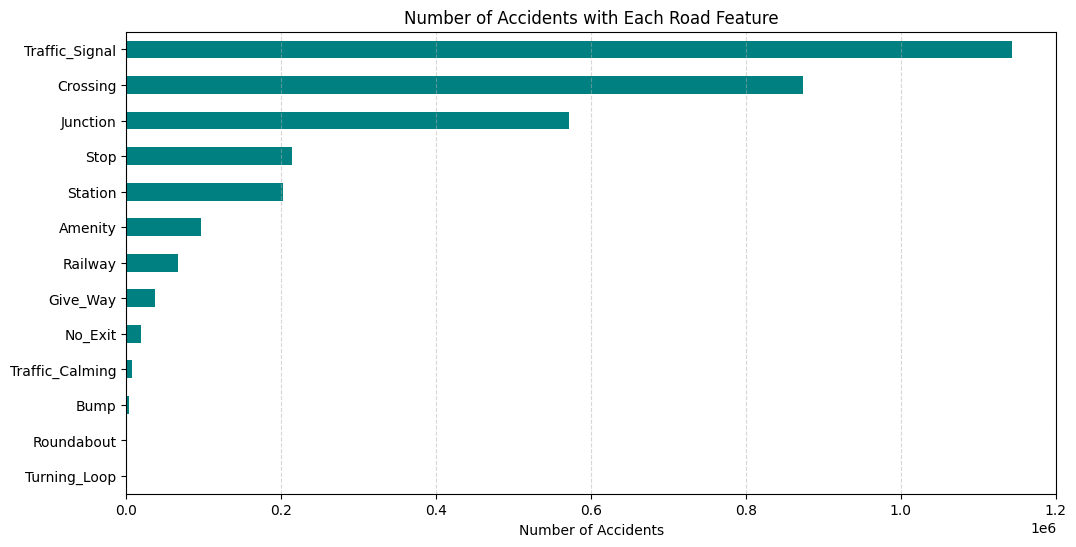

In [31]:

plt.figure(figsize=(12,6))
d[road_features].sum().sort_values().plot(kind='barh', color='teal')
plt.title('Number of Accidents with Each Road Feature')
plt.xlabel('Number of Accidents')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


High-Risk Features:
Most accidents occur near Traffic Signals, Crossings, and Junctions—indicating these are critical points of conflict and demand enhanced traffic control or redesign.

Moderate Impact Areas:
Stop signs and Stations also report notable accident volumes, suggesting driver non-compliance or congestion issues.

Low-Risk or Rarely Reported Features:
Features like Traffic Calming, Bumps, Roundabouts, and Turning Loops show negligible accidents—possibly due to either actual safety benefits or underreporting.

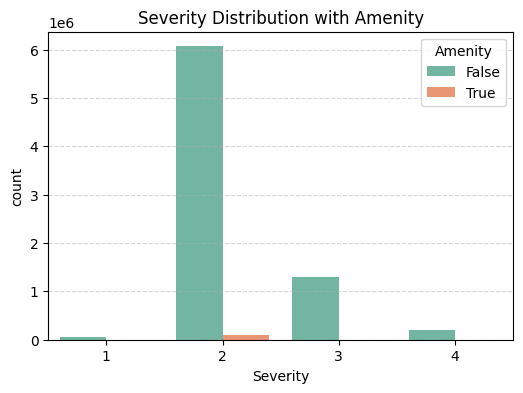

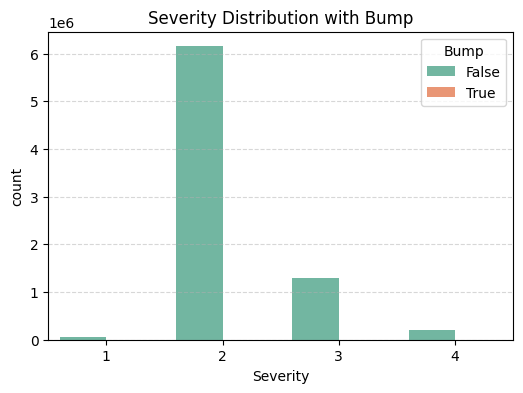

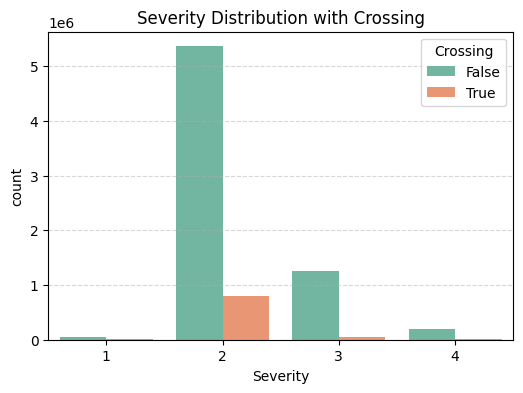

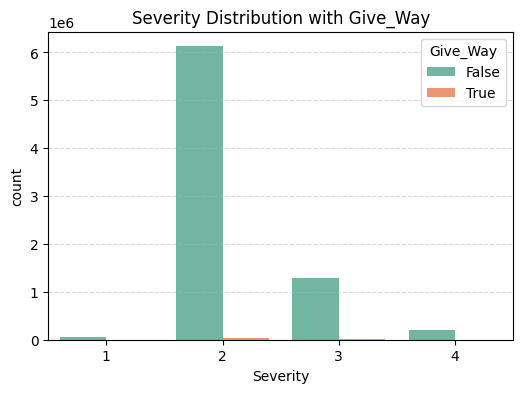

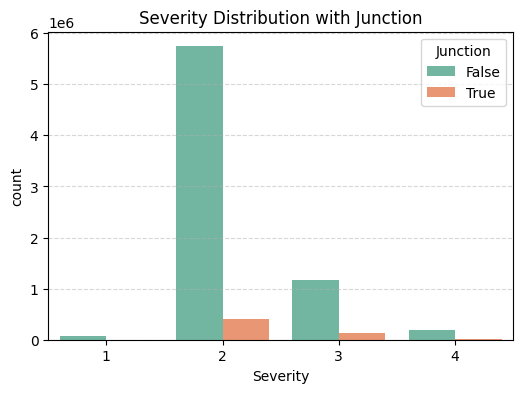

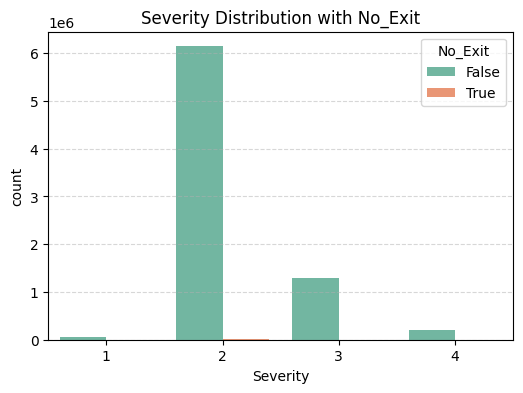

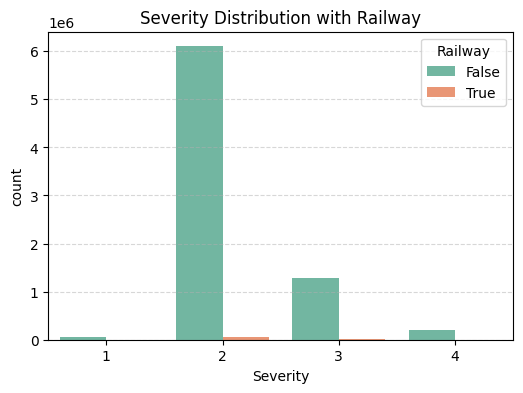

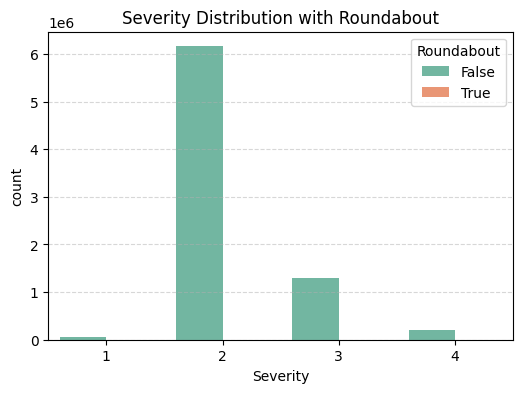

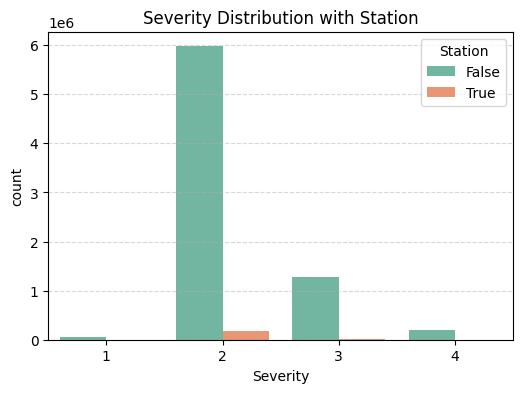

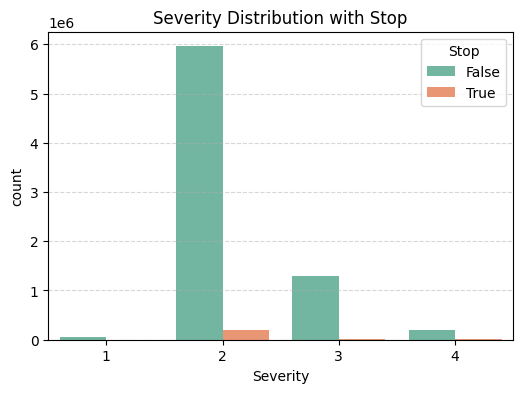

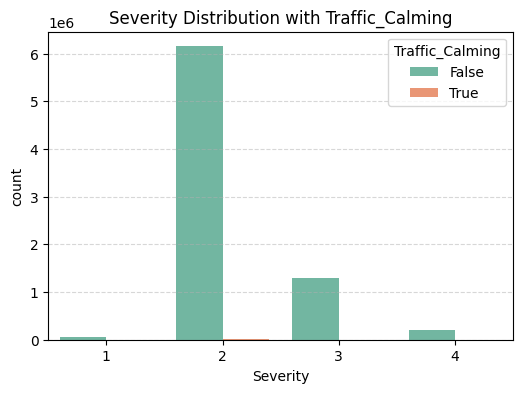

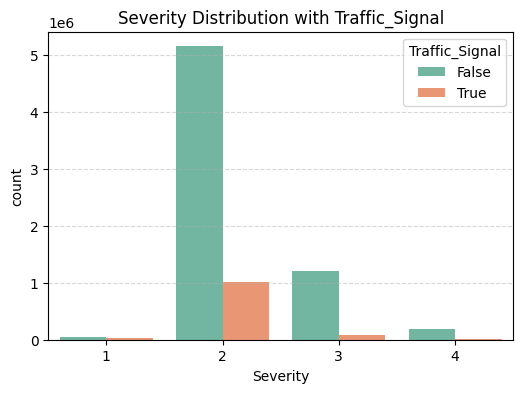

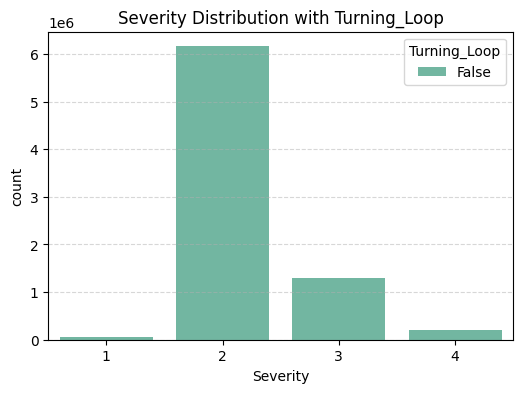

In [32]:
for col in road_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=d, x='Severity', hue=col, palette='Set2')
    plt.title(f'Severity Distribution with {col}')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()


Junctions show a high number of accidents, mostly at severity level 2, but also noticeable at levels 3 and 4.
These are common conflict points where vehicles intersect.

Traffic Signals also have a high accident count, mostly at severity 2.
Signals usually appear at busy intersections, increasing the chance of collisions.

Crossings (pedestrian zones) show a moderate number of accidents, mostly severity 2 and some at 3.Involves pedestrian movement, so there’s a moderate risk.

Stop signs and Give Way signs have relatively few accidents, mostly severity 2.
Generally safe, though minor accidents can happen due to sudden braking.

Roundabouts show very few accidents, with mostly low severity. They slow down traffic naturally, reducing accident risk.

Bumps and Traffic Calming zones have extremely low accident counts.
These features effectively reduce vehicle speed and prevent accidents.

Railway crossings are rare, but some accidents show up at severity 3.
High risk when they occur, though frequency is low.

Stations, No Exit areas, and Amenities show very few accidents, mostly at severity 2.
These are typically low-traffic zones and safer overall.

Turning Loop only appears as False in the data — meaning either it's very rare or not recorded.
No conclusions can be drawn from this.

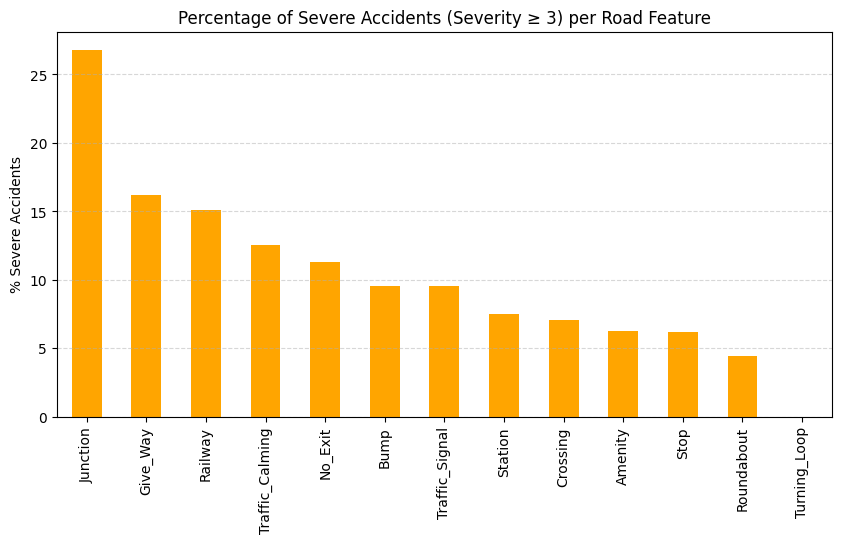

In [33]:
severity_ratio = {}
for col in road_features:
    temp = d[d[col] == True]
    if len(temp) == 0:
        severity_ratio[col] = 0  # or np.nan if you want to skip it
    else:
        ratio = len(temp[temp['Severity'] >= 3]) / len(temp) * 100
        severity_ratio[col] = round(ratio, 2)

# Plot
plt.figure(figsize=(10,5))
pd.Series(severity_ratio).sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Percentage of Severe Accidents (Severity ≥ 3) per Road Feature')
plt.ylabel('% Severe Accidents')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


Highest Risk for Severity:
Junctions have the highest rate of severe accidents (~27%), highlighting them as the most dangerous in terms of impact—not just frequency.

Moderate Severity Zones:
Give Way, Railway, and Traffic Calming zones have >10% severe accident share, demanding better visibility, warnings, or infrastructure improvement.

Low Severity but High Volume Areas:
Traffic Signals and Crossings, though frequent in total accidents (seen earlier), have <10% severe cases, implying mostly low-impact incidents.

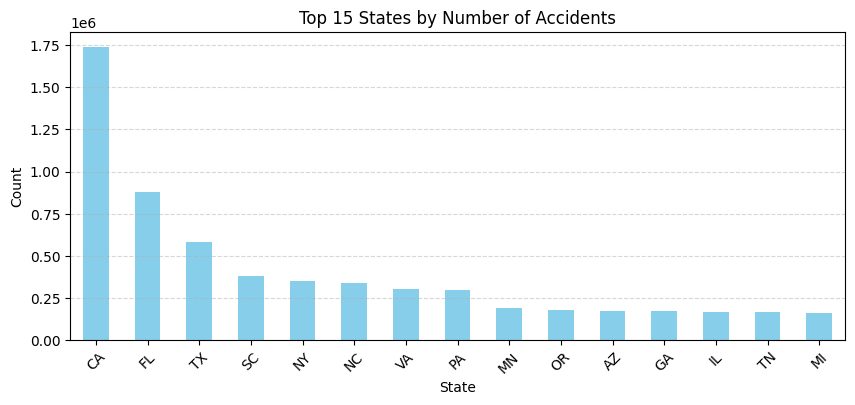

In [34]:
d['State'].value_counts().head(15).plot(kind='bar', figsize=(10,4), color='skyblue')
plt.title("Top 15 States by Number of Accidents")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


California (CA) has the highest accident count — more than 1.7 million.
Huge population, high traffic density, and urban spread.

Florida (FL) and Texas (TX) follow, but with significantly lower numbers.
Still among the most accident-heavy states.

States like South Carolina (SC), New York (NY), North Carolina (NC), and Virginia (VA) have moderate accident counts.
Mostly eastern, populated states.

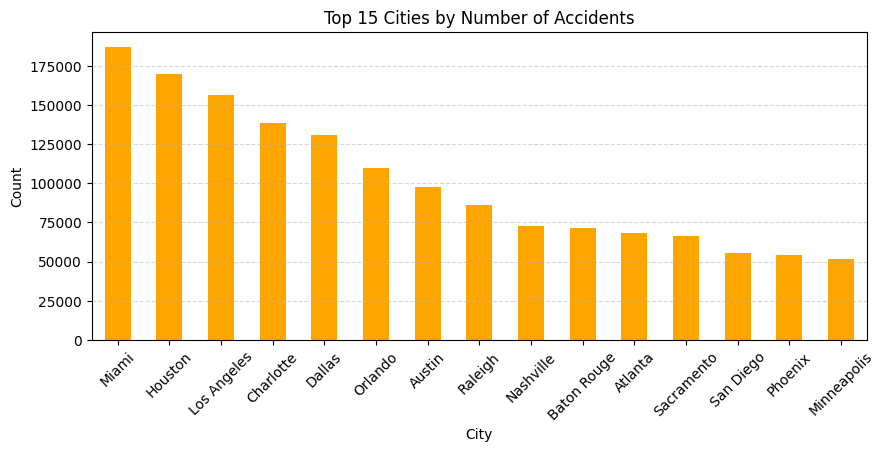

In [35]:
d['City'].value_counts().head(15).plot(kind='bar', figsize=(10,4), color='orange')
plt.title("Top 15 Cities by Number of Accidents")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


Miami has the most reported accidents among cities, followed by Houston and Los Angeles.
High population and tourist activity likely contribute.

Other major contributors: Charlotte, Dallas, Orlando, Austin, Raleigh, etc.
All of these are growing metro regions with heavy daily traffic.

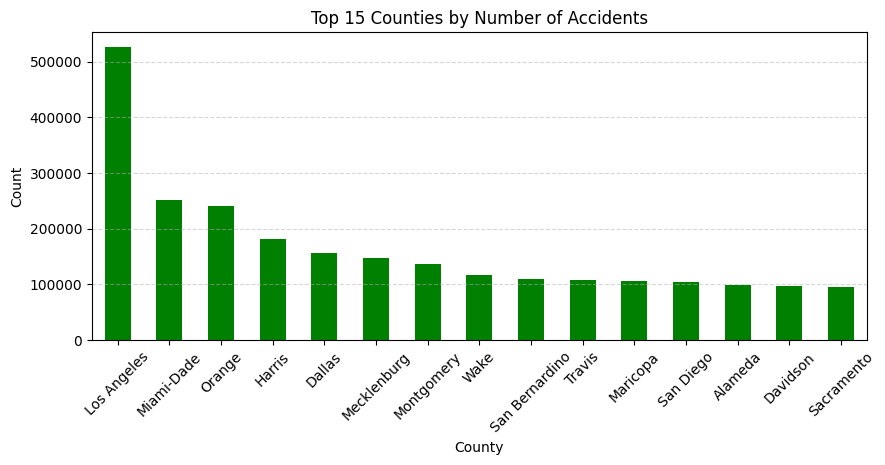

In [36]:
d['County'].value_counts().head(15).plot(kind='bar', figsize=(10,4), color='green')
plt.title("Top 15 Counties by Number of Accidents")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Los Angeles County alone reports over 500,000 accidents — highest by far.
Aligns with the city-level data of Los Angeles.

Miami-Dade and Orange County also report high accident counts.
Florida again stands out here.

Counties like Harris, Dallas, Mecklenburg, Montgomery, Wake also show up frequently.
These are counties containing or near the high-accident cities listed above.



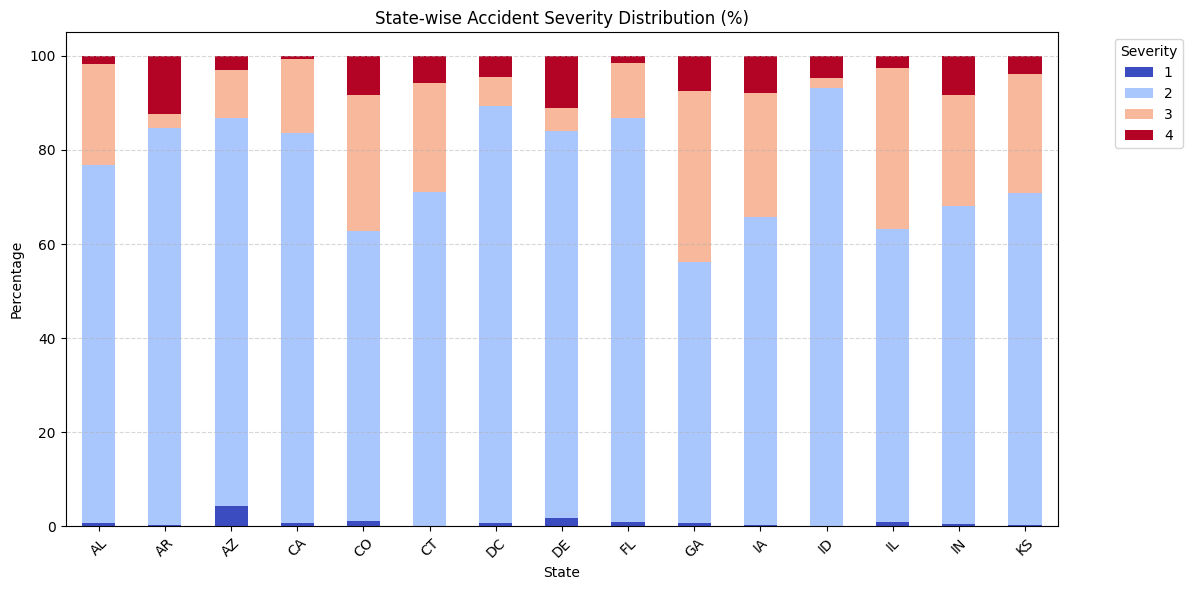

In [37]:
state_severity = d.groupby(['State', 'Severity']).size().unstack().fillna(0)
state_severity_percent = state_severity.div(state_severity.sum(axis=1), axis=0) * 100

state_severity_percent.head(15).plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('State-wise Accident Severity Distribution (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Most states show a very high percentage of Severity 2 accidents (light blue bars).
These are likely moderate-level accidents — not too minor, not too critical.

Delaware (DE) and District of Columbia (DC) show higher shares of Severity 3 and 4 (darker red shades).
These places may have more dangerous road conditions or reporting bias.

Florida (FL) and Georgia (GA) also show slightly elevated levels of severity 3, compared to others.
Possibly due to road infrastructure or driving behavior.

Arizona (AZ), California (CA), and Colorado (CO) have mostly severity 2 but also include some 1 and 3.
Mixed severity profile, but still dominated by moderate accidents.

>Urban areas (like LA, Miami, Houston) and their counties are top contributors to accident volume.
>
>California and Florida dominate across states, cities, and counties.
>
>Severity 2 is the most common across almost all regions — possibly due to consistent reporting standards.
>
>Few states stand out with more severe (3 or 4) accidents — like DE, DC, FL, GA.

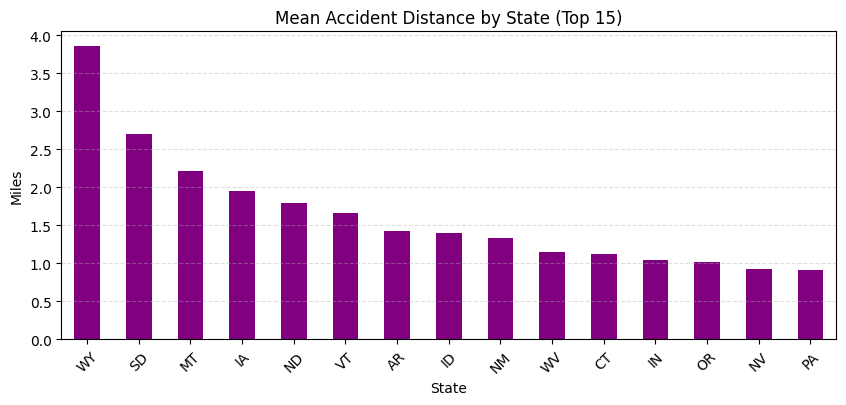

In [38]:
state_distance = d.groupby('State')['Distance(mi)'].mean().sort_values(ascending=False).head(15)

state_distance.plot(kind='bar', figsize=(10,4), color='purple')
plt.title('Mean Accident Distance by State (Top 15)')
plt.ylabel('Miles')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()


Rural States Dominate:
States like Wyoming (WY), South Dakota (SD), and Montana (MT) show the highest mean accident distances (up to 3.9 miles), suggesting accidents often happen far from city centers, likely on highways or rural roads.

Urbanized States Have Shorter Distances:
States like Connecticut (CT), Indiana (IN), and Pennsylvania (PA) show much shorter average distances (<1.1 miles), indicating more urban or suburban accidents.

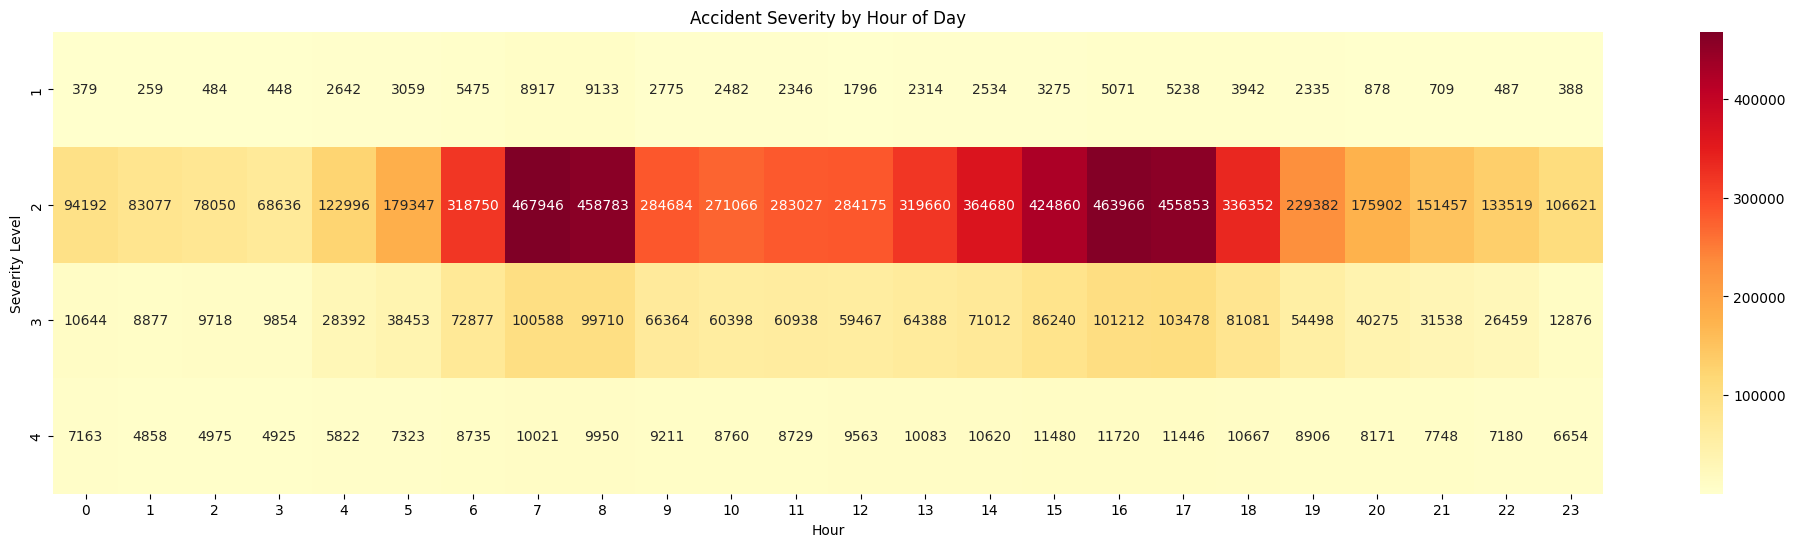

In [39]:
severity_hour = pd.crosstab(d['Start_Hour'], d['Severity'])

plt.figure(figsize=(25,6))
sns.heatmap(severity_hour.T, cmap='YlOrRd', annot=True, fmt='d')
plt.title("Accident Severity by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Severity Level")
plt.show()


>Severity 2 dominates across all hours — especially during daytime.
>
>Peak: 7 AM to 6 PM, especially 8 AM & 5 PM.
>
>These hours align with morning and evening rush hours.
>
>Commuting time = higher traffic + more exposure = more accidents.
>
Severity 3 also follows a similar pattern to Severity 2, but with lower values.

Peak around 8 AM to 6 PM as well.

Possibly slightly more serious accidents during heavy traffic.

>Severity 1 (minor) and Severity 4 (most serious) are far fewer across all hours.
>
>Severity 4 has small peaks around 8 AM to 6 PM.
>
>Severe accidents still tend to cluster in traffic hours, just less frequently.
>
Very low accident counts at late night/early morning (0–5 AM) across all severities.

Lower traffic volume at night = fewer accidents.



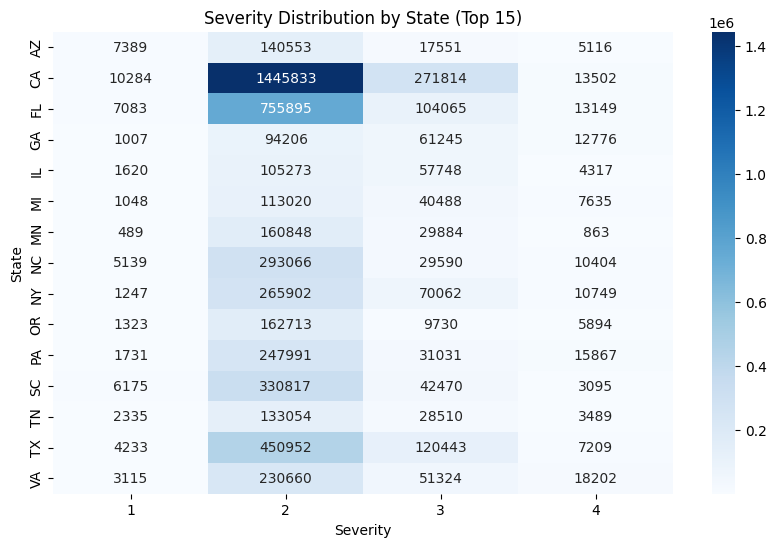

In [40]:
top_states = d['State'].value_counts().head(15).index
subset = d[d['State'].isin(top_states)]

severity_state = pd.crosstab(subset['State'], subset['Severity'])

plt.figure(figsize=(10, 6))
sns.heatmap(severity_state, cmap='Blues', annot=True, fmt='d')
plt.title("Severity Distribution by State (Top 15)")
plt.xlabel("Severity")
plt.ylabel("State")
plt.show()


>California (CA) has by far the most accidents — over 1.4 million Severity 2 alone.
>
>Also leads in every severity level.
>
>High population + traffic density = largest share.
>
Florida (FL) and Texas (TX) follow, with large Severity 2 and considerable Severity 3 & 4 counts.

These are also high-traffic states with large urban regions.

>Virginia (VA) and South Carolina (SC) show a relatively higher proportion of severe accidents (Severity 3 & 4) compared to their total.
>
>May indicate more dangerous driving conditions or rural road issues.
>
States like New York (NY) and Illinois (IL) have high accident counts, but still show the usual trend: mostly Severity 2.

Typical of urban traffic incidents with moderate outcomes.

>Arizona (AZ) and Michigan (MI) also show decent shares, but again Severity 2 dominates.

Accidents peak during commute hours (8 AM & 5 PM) — for all severities.

Severity 2 is overwhelmingly dominant in every state and hour.

Urban-heavy states (CA, FL, TX) show highest raw counts.

Some states (like VA, SC) show comparatively higher severe accident rates.

Night hours (0–5 AM) have the least accidents, regardless of severity.

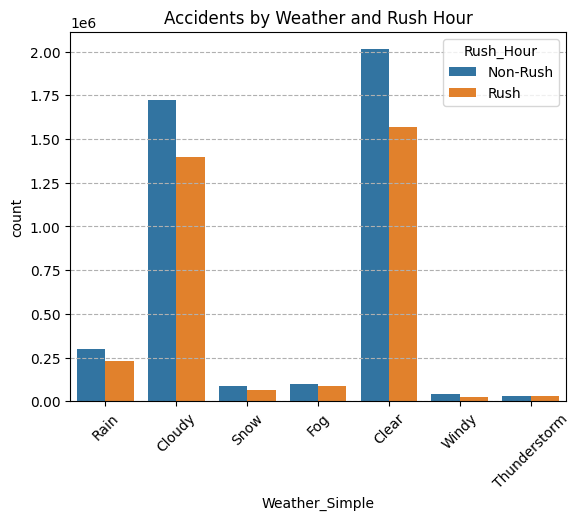

In [41]:
sns.countplot(x='Weather_Simple', hue='Rush_Hour', data=d[d['Weather_Simple'] != 'Other'])
plt.title("Accidents by Weather and Rush Hour")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')
plt.show()


Clear and Cloudy Weather Dominate:
Most accidents occur in Clear and Cloudy conditions—suggesting that driver complacency, not poor visibility, may be a key factor.

Rush Hour Amplifies Risk:
Across all weather types, Rush Hour accidents are consistently high, with Clear weather during rush hour still seeing over 1.5M accidents—highlighting congestion and time pressure as major contributors.

Fog, Snow, and Rain Are Risky Too:
Although total numbers are lower, Snow, Fog, and Rain still cause significant accidents, even more so during non-rush hours, likely due to poor road traction and visibility.

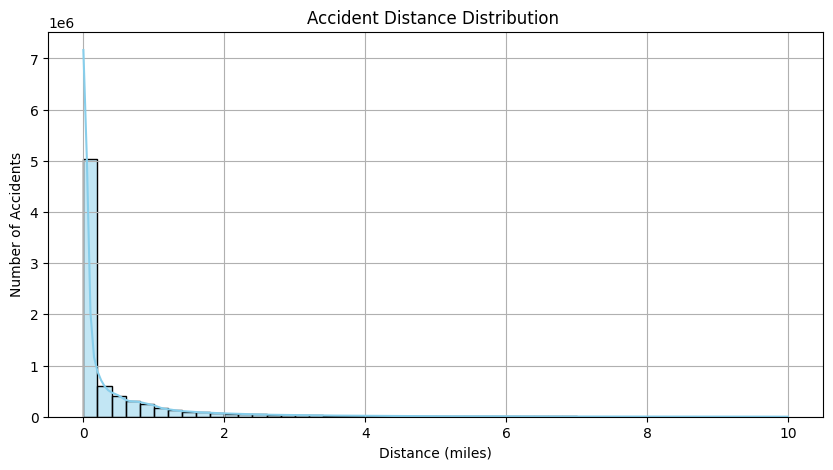

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(d[d['Distance(mi)'] <= 10]['Distance(mi)'], bins=50, kde=True, color='skyblue')
plt.title('Accident Distance Distribution ')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


Extremely right-skewed distribution:

Majority of accidents occur within 0 to 0.5 miles.

Sharp drop after 1 mile.

Most accidents are very local in nature — close to the start or end point of travel.

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\3238876582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d[d['Distance(mi)'] <=4 ], x='Severity', y='Distance(mi)', palette='Set2')


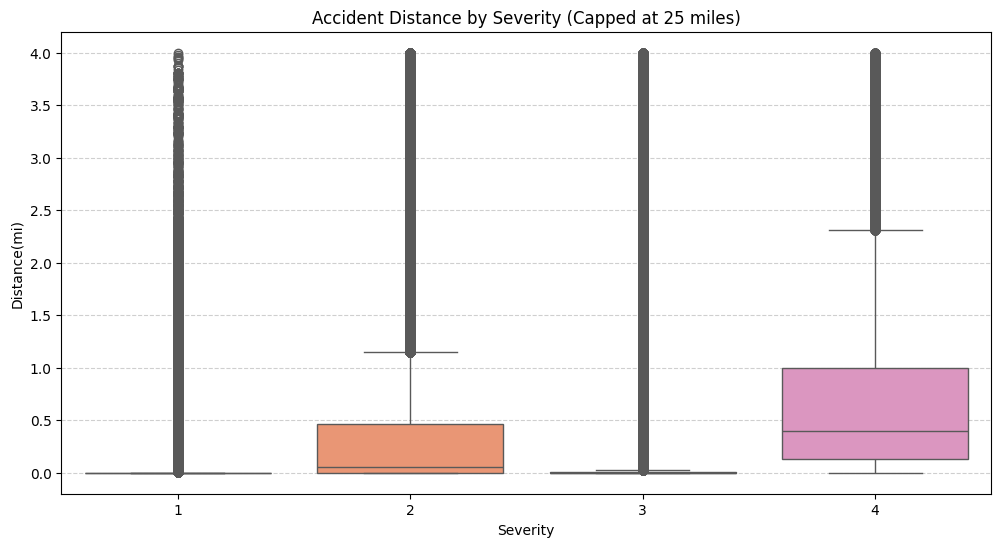

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data=d[d['Distance(mi)'] <=4 ], x='Severity', y='Distance(mi)', palette='Set2')
plt.title('Accident Distance by Severity (Capped at 25 miles)')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


Snowy weather has the highest median and range in accident distance.

Slippery roads may lead to longer skids or delayed response, increasing accident distance.

Clear and cloudy conditions show much lower accident distances on average.

Thunderstorms and fog show lowest medians, possibly due to slower driving and shorter travel visibility.

C:\Users\baraa\AppData\Local\Temp\ipykernel_20352\770587055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_Simple', y='Distance(mi)',


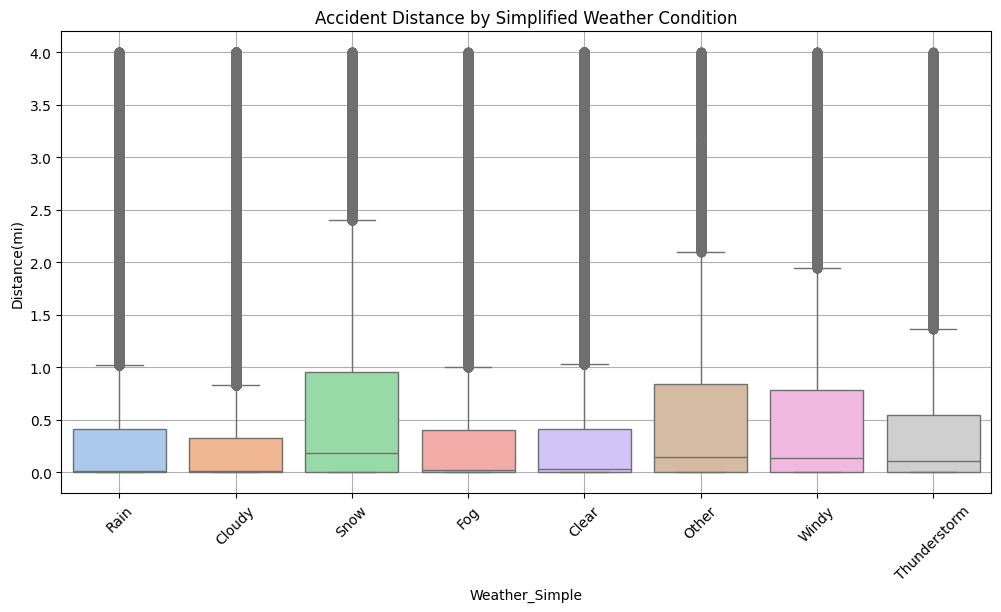

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Weather_Simple', y='Distance(mi)', 
            data=d[d['Distance(mi)'] <= 4], palette='pastel')
plt.title('Accident Distance by Simplified Weather Condition')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Severity 1: Very short distances (most minor accidents are hyper-local).

Severity 4: Median distance is much higher — also widest spread.

More serious accidents might occur on highways or long-distance roads.

Severity increases → distance tends to increase.

Possibly more speed or momentum involved in long-distance routes.

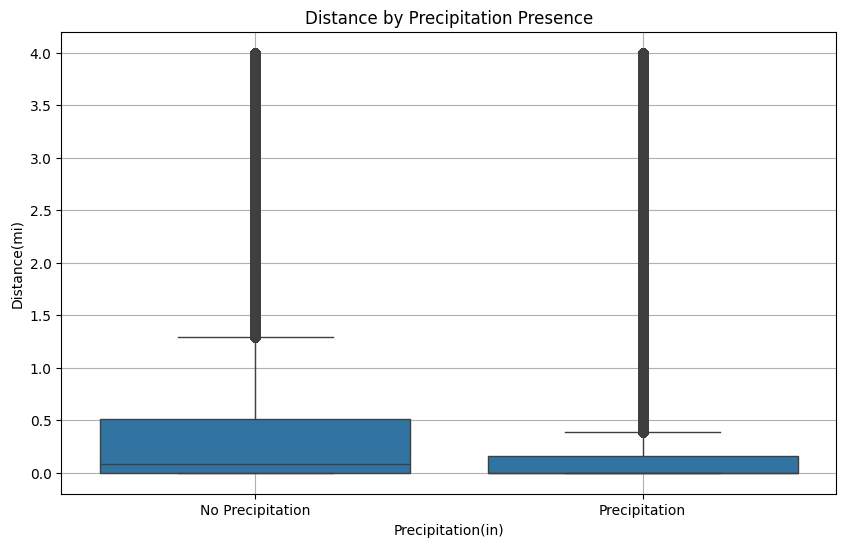

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=(d['Precipitation(in)'] > 0), y='Distance(mi)', data=d[d['Distance(mi)'] <= 4])
plt.title('Distance by Precipitation Presence')
plt.xticks([0,1], ['No Precipitation', 'Precipitation'])
plt.grid(True)
plt.show()


With precipitation (rain, snow, etc.):

Lower median distance than dry conditions.

But more extreme outliers (some very long-distance accidents).

Wet weather may reduce speed → fewer long-distance accidents in general, but occasionally severe ones.

Most accidents happen within 0.5 miles — likely in local driving.

Worse weather (like snow or storms) slightly increases accident distances.

More severe accidents (Severity 4) tend to happen over longer distances.

Precipitation = lower typical distances, but some extreme outliers exist.

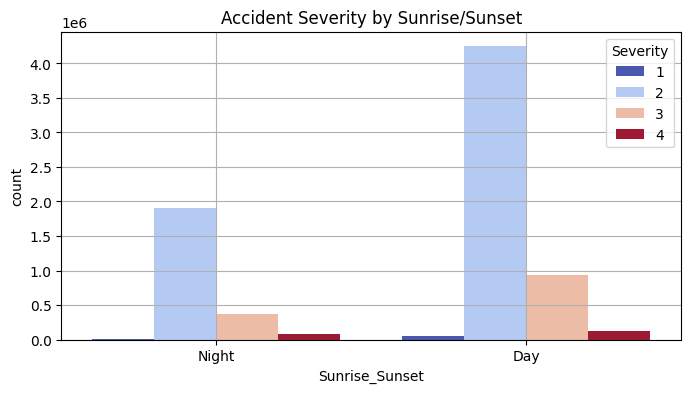

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=d, palette='coolwarm')
plt.title("Accident Severity by Sunrise/Sunset")
plt.grid(True)
plt.show()


More Accidents in Daylight:
Most accidents occur during the day, especially of Severity 2 (moderate), likely due to higher traffic volume and activity.

Higher Severity Proportion at Night:
While fewer accidents happen at night, the proportion of severe cases (Severity 3 & 4) is notably higher compared to daytime.

Severity 4 (Most Severe) is almost equal during both day and night, despite lower overall volume at night—indicating night accidents tend to be deadlier.

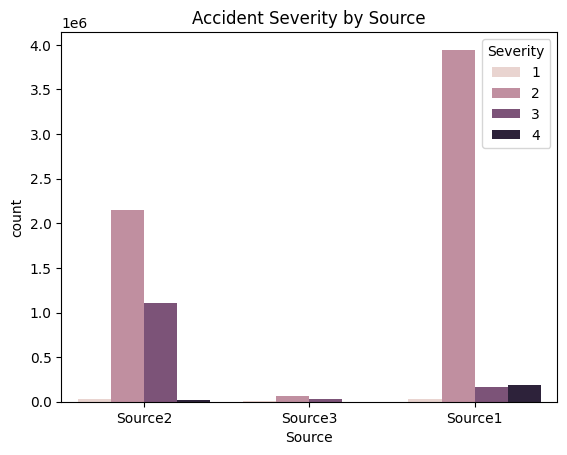

In [47]:
sns.countplot(x='Source', hue='Severity', data=d)
plt.title("Accident Severity by Source")
plt.show()


Source1 dominates the total accident records, especially for Severity 2, but it also reports a higher number of Severity 4 (most severe) accidents than the others.

Source2 has more balanced reporting between Severity 2 and 3, but fewer extreme cases (Severity 4), possibly indicating different data collection priorities or thresholds.

Source3 contributes the least overall but still reflects some severe cases, which may hint at niche or underrepresented areas.

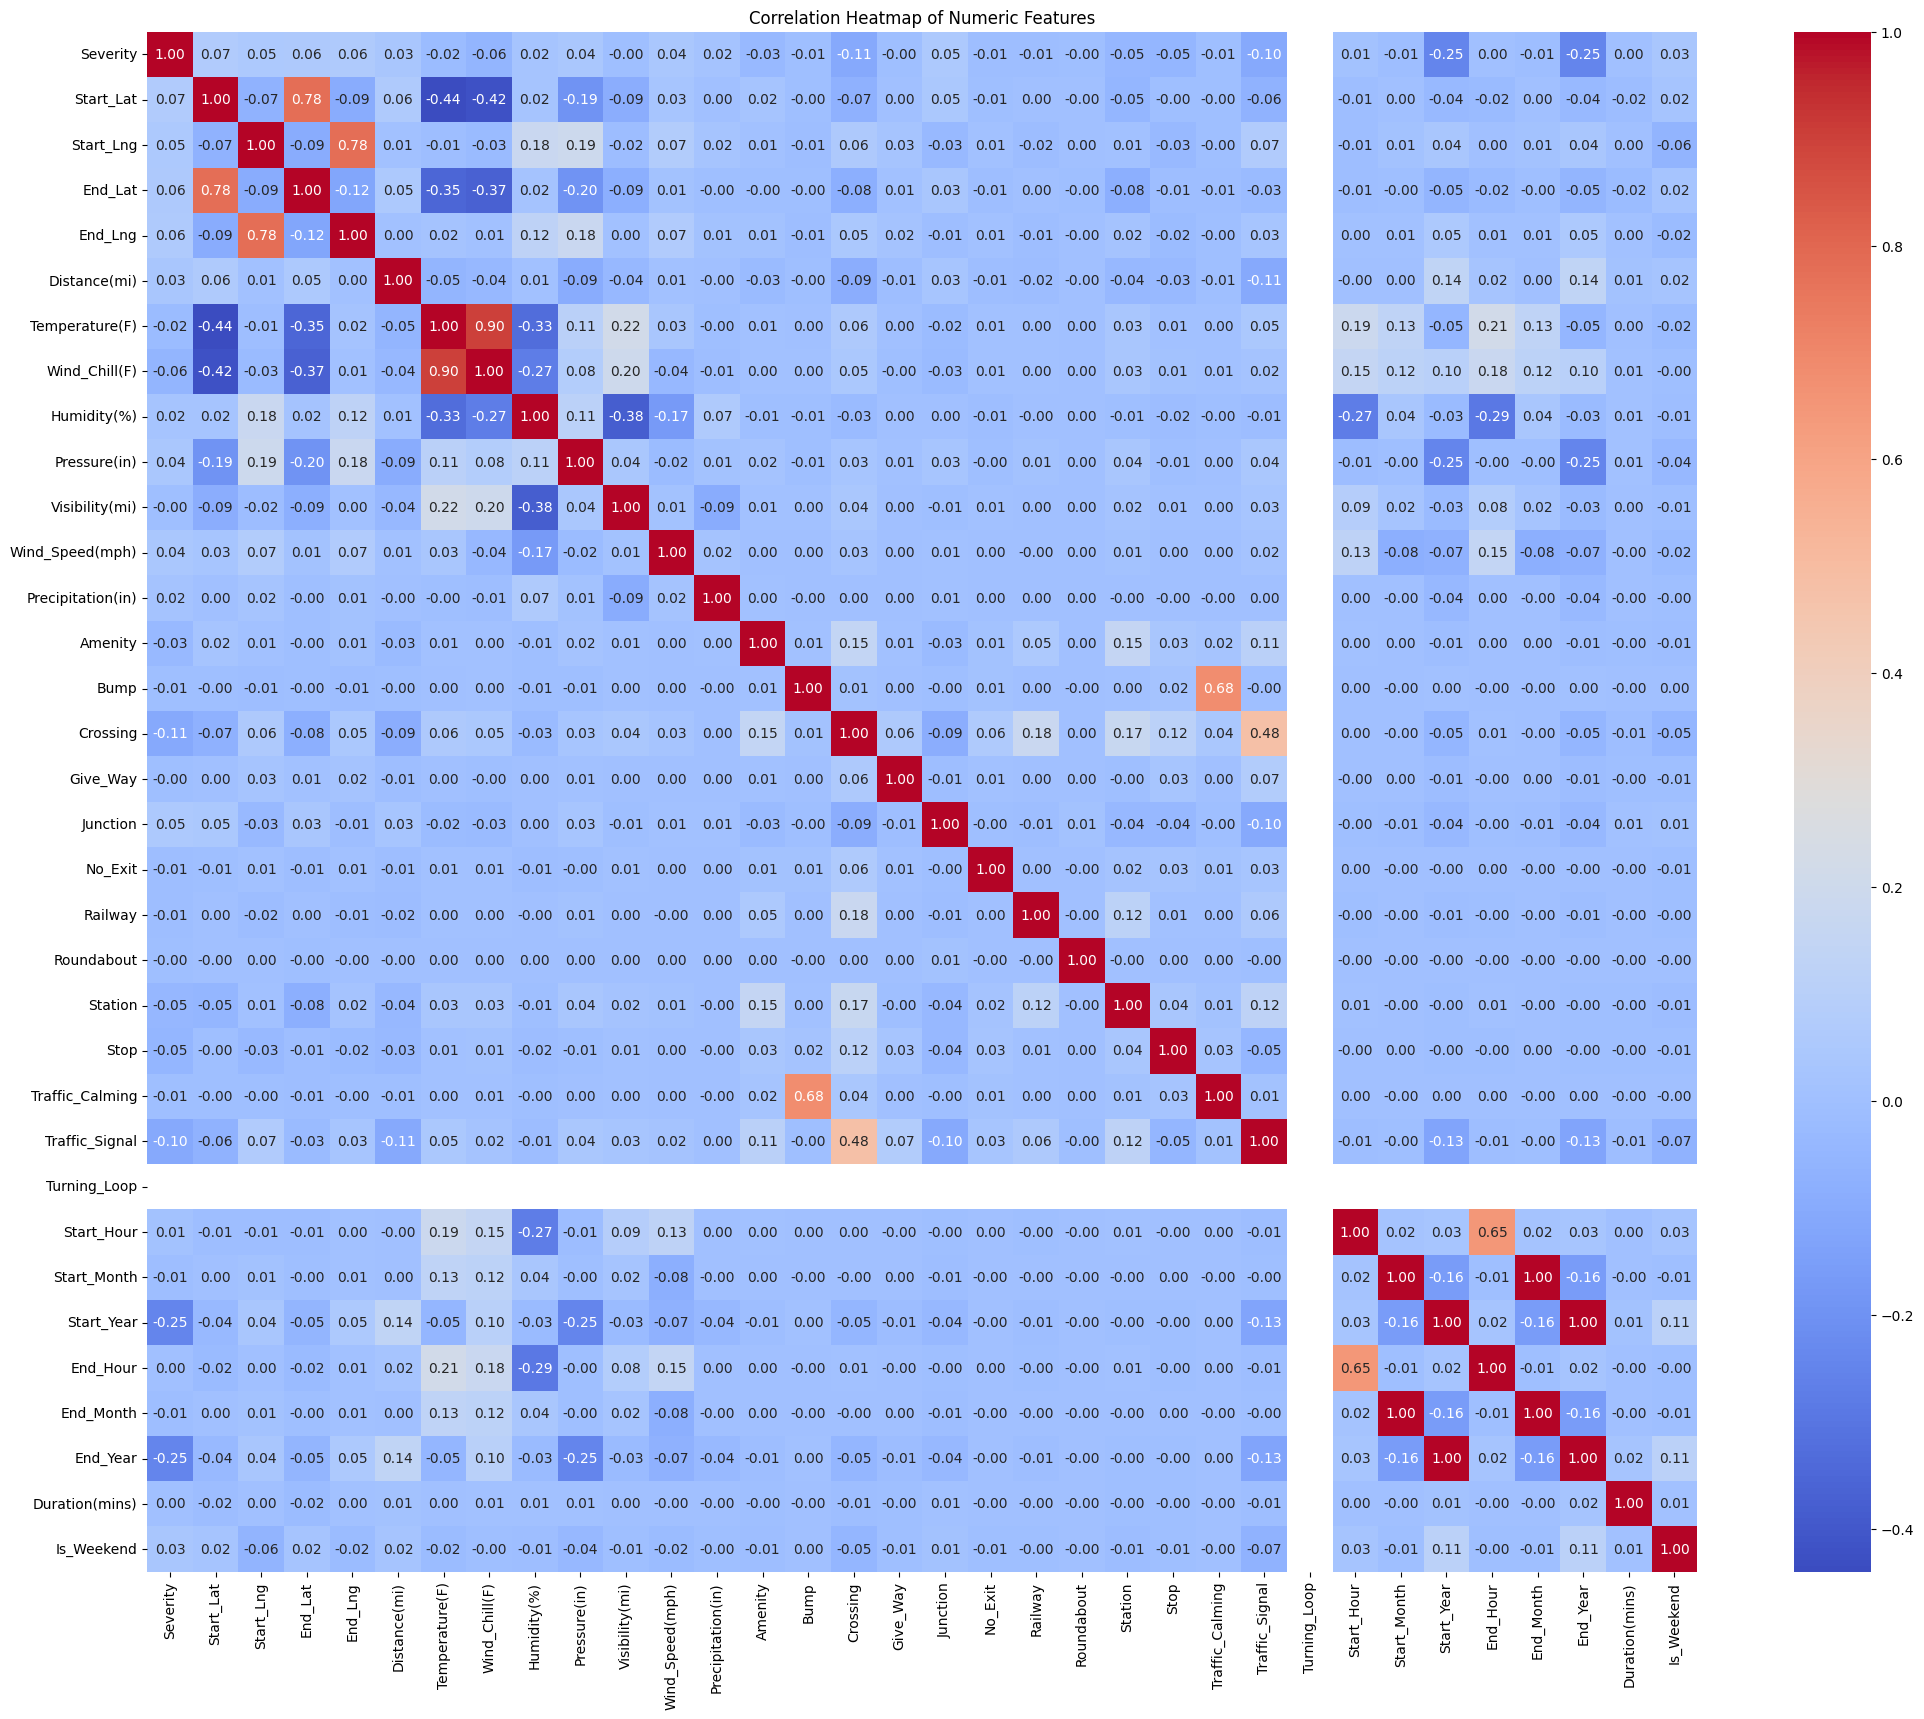

In [52]:
plt.figure(figsize=(25,20))
sns.heatmap(d.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In the correlation matrix, no single feature explains severity, pointing to the need for more multivariate analysis

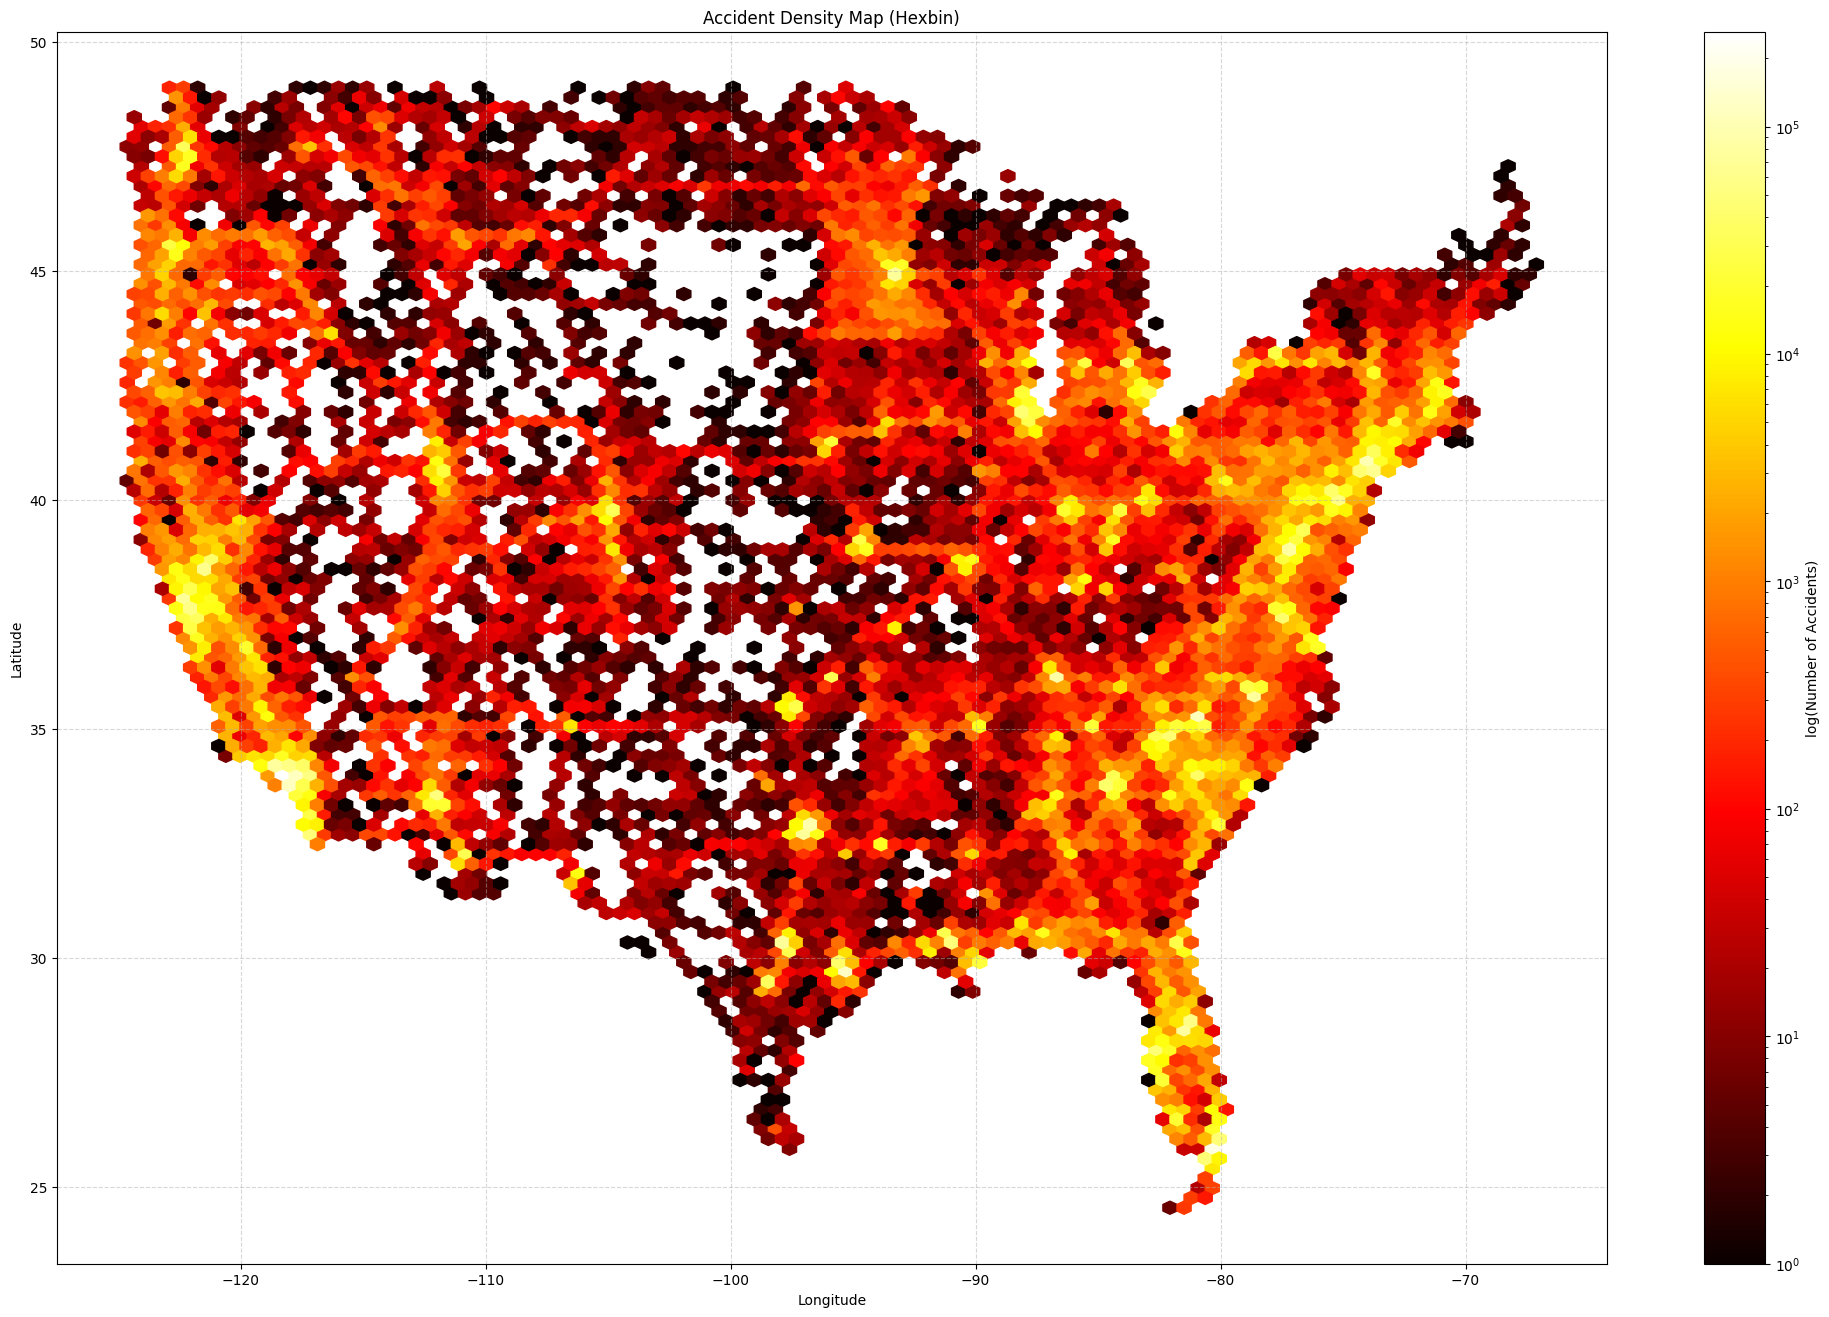

In [42]:
plt.figure(figsize=(25,16))
plt.hexbin(d['Start_Lng'], d['Start_Lat'], gridsize=100, cmap='hot',bins='log')
plt.colorbar(label='log(Number of Accidents)')
plt.title('Accident Density Map (Hexbin)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


High-Density Clusters:
Accidents are heavily concentrated along the East Coast, California, Texas, and Florida—indicating high urban density and traffic volumes in these regions.

Sparse Zones:
The Midwest, Rocky Mountains, and parts of the Southwest show relatively low accident density, correlating with lower population and traffic flow.

Corridor Patterns:
Accident densities trace major interstate highways, especially around metro areas like New York, Los Angeles, Chicago, and Atlanta.